<a href="https://colab.research.google.com/github/seyeonjungGit/P_Project_YOUTUBE_Analysis/blob/main/Youtube_Analysis(Q1_(3%2C4)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 설치 & 기본설정

matplotlib 폰트 설치
- 설치 후 런타임 재시작

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
# 설정 변환을 위해서 matplotlib만 import
import matplotlib as mpl
import warnings

# Windows
mpl.rc("font", family='NanumBarunGothic')

# 폰트변경 후 마이너스 사인 수정
mpl.rc('axes', unicode_minus=False)

# 화질설정
%config InlineBackend.figure_format='retina'

warnings.filterwarnings("ignore")
%matplotlib inline

프로파일링 설치

In [ ]:
# pip install -U pandas-profiling

In [ ]:
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

# 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df_origin = pd.read_csv('/content/drive/MyDrive/preon_nlp/기업과제자료/pretest_data.csv')
df_origin.head(3)

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
0,V-0db,CH49ta0,2021-07-01,Entertainment,PT8M20S,SiriusXM|Sirius XM|Sirius|SXM|BIGHIT|빅히트|방탄소년단...,BTS performs their hit songs ‘Dynamite’ and ‘B...,2021-07-03,2021-07-04,13,...,792,1014,10373,10720,1080000,1080000,685992413,687485021,5947,5950
1,V-1XL,CHZVD--,2021-06-24,Entertainment,PT9M17S,치킨불냉면|치킨|불냉면|냉면,영상에 나오는 캐릭터의 이름은 파도비 입니다. 고양이가 아니라 파란 도깨비입니다. ...,2021-06-26,2021-06-27,28,...,121,154,1083,1173,627000,628000,75327083,75685030,70,70
2,V-4fa,CH9w-h_,2021-07-17,Entertainment,PT7M39S,NaN,"거세 구형, 성 충동 제거를 위한 엄벌 치료 VS 인권 보호해야고민 끝에 내린 강요...",2021-07-19,2021-07-22,1,...,162,233,696,1006,5750000,5750000,5424167911,5431617741,34270,34341


In [ ]:
df_origin.shape

(2644, 25)

In [ ]:
df_origin.duplicated().sum()

0

중복데이터는 없음

In [ ]:
df_origin.isnull().sum()

video_id                      0
channel_id                    0
published_date                0
category_name                 0
duration                      0
tags                        370
description                  40
on_trending_date              0
off_trending_date             0
on_rank                       0
off_rank                      0
on_views                      0
off_views                     0
on_likes                      0
off_likes                     0
on_dislikes                   0
off_dislikes                  0
on_comments                   0
off_comments                  0
on_channel_subscribers        0
off_channel_subscribers       0
on_channel_total_views        0
off_channel_total_views       0
on_channel_total_videos       0
off_channel_total_videos      0
dtype: int64

결측치는 tags와 description에 분포

- tags                        370
- description                  40

In [ ]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   video_id                  2644 non-null   object
 1   channel_id                2644 non-null   object
 2   published_date            2644 non-null   object
 3   category_name             2644 non-null   object
 4   duration                  2644 non-null   object
 5   tags                      2274 non-null   object
 6   description               2604 non-null   object
 7   on_trending_date          2644 non-null   object
 8   off_trending_date         2644 non-null   object
 9   on_rank                   2644 non-null   int64 
 10  off_rank                  2644 non-null   int64 
 11  on_views                  2644 non-null   int64 
 12  off_views                 2644 non-null   int64 
 13  on_likes                  2644 non-null   int64 
 14  off_likes               

2644row와 25columns, object와 int 형이 있음.

## 판다스 프로파일링

In [ ]:
# from pandas_profiling import ProfileReport
# profile=df.profile_report() 
# profile.to_file('./Youtube_report1.html') 

## 전처리(형변환)

In [ ]:
df_origin.columns

Index(['video_id', 'channel_id', 'published_date', 'category_name', 'duration',
       'tags', 'description', 'on_trending_date', 'off_trending_date',
       'on_rank', 'off_rank', 'on_views', 'off_views', 'on_likes', 'off_likes',
       'on_dislikes', 'off_dislikes', 'on_comments', 'off_comments',
       'on_channel_subscribers', 'off_channel_subscribers',
       'on_channel_total_views', 'off_channel_total_views',
       'on_channel_total_videos', 'off_channel_total_videos'],
      dtype='object')

In [ ]:
import copy

# 원본 보존(dataframe은 mutable한 객체이므로 복제를 위해 deepcopy(깊은복사) 이용)
df = copy.deepcopy(df_origin)

In [ ]:
from datetime import date

# 이후 편의를 위해 날짜형 데이터로 형변환
df['published_date'] = pd.to_datetime(df['published_date'])
df['on_trending_date'] = pd.to_datetime(df['on_trending_date'])
df['off_trending_date'] = pd.to_datetime(df['off_trending_date'])

In [ ]:
# 형변환 확인
df.dtypes

video_id                            object
channel_id                          object
published_date              datetime64[ns]
category_name                       object
duration                            object
tags                                object
description                         object
on_trending_date            datetime64[ns]
off_trending_date           datetime64[ns]
on_rank                              int64
off_rank                             int64
on_views                             int64
off_views                            int64
on_likes                             int64
off_likes                            int64
on_dislikes                          int64
off_dislikes                         int64
on_comments                          int64
off_comments                         int64
on_channel_subscribers               int64
off_channel_subscribers              int64
on_channel_total_views               int64
off_channel_total_views              int64
on_channel_

## summary statistics

In [ ]:
# Numeric data에 대한 통계 확인 (datetime형 포함)
df.describe(datetime_is_numeric=True)

,published_date,on_trending_date,off_trending_date,on_rank,off_rank,on_views,off_views,on_likes,off_likes,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
count,2644,2644,2644,2644.000000,2644.000000,2.644000e+03,2.644000e+03,2.644000e+03,2.644000e+03,2644.000000,2644.000000,2.644000e+03,2.644000e+03,2.644000e+03,2.644000e+03,2.644000e+03,2.644000e+03,2644.000000,2644.000000
mean,2021-05-27 14:13:58.729198336,2021-05-29 15:45:28.593040896,2021-05-30 23:40:23.600605184,20.234493,35.795386,9.534819e+05,1.432732e+06,5.465813e+04,6.845384e+04,534.279879,860.402421,9.032085e+03,1.111202e+04,1.742059e+06,1.748095e+06,8.639525e+08,8.665469e+08,9276.285174,9229.746596
min,2021-03-25 00:00:00,2021-03-27 00:00:00,2021-04-01 00:00:00,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.531600e+04,5.531600e+04,1.000000,1.000000
25%,2021-04-27 00:00:00,2021-04-29 00:00:00,2021-04-30 00:00:00,9.000000,28.000000,2.353520e+05,3.068540e+05,4.208500e+03,4.932750e+03,86.000000,108.000000,5.110000e+02,5.977500e+02,1.480000e+05,1.507500e+05,3.698228e+07,3.780661e+07,118.000000,118.000000
50%,2021-05-28 00:00:00,2021-05-30 00:00:00,2021-05-31 00:00:00,19.000000,37.000000,4.279245e+05,5.715080e+05,7.851000e+03,9.507000e+03,159.000000,211.000000,1.157000e+03,1.311500e+03,4.670000e+05,4.695000e+05,1.215355e+08,1.223838e+08,326.500000,327.500000
75%,2021-06-27 00:00:00,2021-06-29 00:00:00,2021-07-01 00:00:00,30.000000,45.000000,8.268800e+05,1.119499e+06,1.688350e+04,2.085950e+04,315.000000,435.000000,2.720000e+03,3.150750e+03,1.272500e+06,1.282500e+06,4.857386e+08,4.878799e+08,1245.250000,1244.500000
max,2021-07-29 00:00:00,2021-07-31 00:00:00,2021-07-31 00:00:00,50.000000,50.000000,9.727667e+07,2.488763e+08,8.097173e+06,1.575992e+07,37349.000000,133721.000000,4.625133e+06,6.659938e+06,5.890000e+07,5.940000e+07,2.170125e+10,2.170568e+10,545577.000000,545764.000000
std,NaN,NaN,NaN,12.833115,10.376753,3.200375e+06,6.836354e+06,3.239337e+05,4.983217e+05,2070.643487,4754.238395,1.155321e+05,1.574601e+05,5.546694e+06,5.569829e+06,2.511740e+09,2.518026e+09,43156.370481,43100.803783


3월월 말부터 7월말까지의 데이터이며,

1위부터 50위까지의 인기동영상 데이터입니다.

In [ ]:
# categorical data에 대한 통계 -> 관측값 개수와 유일값개수, 최빈값, 최빈값의 빈도수.
df.describe(include=[object])  

,video_id,channel_id,category_name,duration,tags,description
count,2644,2644,2644,2644,2274,2604
unique,2643,940,15,1200,1978,2492
top,VBSBm,CHQ2O-i,Entertainment,PT8M1S,파뿌리|예능|게임|GAME|오락|버라이어티|variety|웹예능|플레이,Connect with BTS: https://ibighit.com/bts http...
freq,2,17,954,17,14,10


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

# 그래프사이즈와 글꼴사이즈
sns.set(rc = {'figure.figsize':(18,13)})
sns.set(font_scale=1.5)

plt.figure(figsize=(10,8))


# 한글깨짐 및 마이너스 오류 수정
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

<Figure size 720x576 with 0 Axes>

In [ ]:
# 카테고리별 유일값 개수세기. 

category_count = df['category_name'].value_counts(ascending=True).reset_index()\
    .rename(columns = {'index':'categoty_name', 'category_name':'count'})
category_count

,categoty_name,count
0,Nonprofits & Activism,1
1,Travel & Events,23
2,Autos & Vehicles,31
3,Science & Technology,36
4,Education,65
5,Pets & Animals,65
6,Film & Animation,74
7,Gaming,80
8,Howto & Style,119
9,News & Politics,162


In [ ]:
category_count = df['category_name'].value_counts().reset_index()\
    .rename(columns = {'index':'categoty_name', 'category_name':'count'})

In [ ]:
category = category_count['categoty_name'].tolist()
category

['Entertainment',
 'People & Blogs',
 'Music',
 'Sports',
 'Comedy',
 'News & Politics',
 'Howto & Style',
 'Gaming',
 'Film & Animation',
 'Education',
 'Pets & Animals',
 'Science & Technology',
 'Autos & Vehicles',
 'Travel & Events',
 'Nonprofits & Activism']

# Q1.데이터타입별 시각화

In [ ]:
# 필요한 컬럼만 추출
month_df = df[['channel_id', 'category_name', 'published_date', 'on_channel_total_videos']]

# 비디오 제작 일자에서 제작 '월'만 추출.
month_df['published_month'] = month_df['published_date'].apply(lambda x: x.month)

month_df.head(3)

,channel_id,category_name,published_date,on_channel_total_videos,published_month
0,CH49ta0,Entertainment,2021-07-01,5947,7
1,CHZVD--,Entertainment,2021-06-24,70,6
2,CH9w-h_,Entertainment,2021-07-17,34270,7


In [ ]:
month_df.shape

(2644, 5)

In [ ]:
# 분석해야 할 총 채널의 개수
month_df['channel_id'].unique().shape[0]

940

데이터셋은 총 2644행으로 구성되어 있고, 분석해야 할 채널의 총 개수는 940개 입니다.

In [ ]:
# 월별로 데이터를 다른 데이터프레임에 담기
month = [0,1,2,3,4,5,6,7,8,9,10,11,12]
for i in range(3,8):  # 3월에서 7월까지의 데이터이므로
    month[i] = month_df[month_df['published_month'] == i]

In [ ]:
# 월별로 잘 나누어졌는지 확인(기존 데이터프레임 개수와 비교)
month[3].shape[0]+month[4].shape[0]+month[5].shape[0]+month[6].shape[0]+month[7].shape[0] == df.shape[0]

True

In [ ]:
# 월별 분석데이터량 개수
f"3월: {month[3].shape[0]}, 4월: {month[4].shape[0]}, 5월: {month[5].shape[0]}, 6월: {month[6].shape[0]}, 7월: {month[7].shape[0]}"

'3월: 74, 4월: 675, 5월: 656, 6월: 655, 7월: 584'

3월

In [ ]:
month3 = month[3]
month3

,channel_id,category_name,published_date,on_channel_total_videos,published_month
134,CHicKQU,Education,2021-03-30,574,3
138,CHPZ4e8,People & Blogs,2021-03-31,283,3
173,CHqq-ov,Entertainment,2021-03-29,930,3
174,CHaZS_X,People & Blogs,2021-03-30,17641,3
210,CHG9aFJ,News & Politics,2021-03-29,84305,3
...,...,...,...,...,...
2474,CHnet0I,People & Blogs,2021-03-28,153,3
2487,CHtCiO5,Music,2021-03-31,1490,3
2509,CHYDmx2,Music,2021-03-31,1846,3
2549,CHyuL_X,People & Blogs,2021-03-31,90,3


In [ ]:
category_df3= category.copy()

In [ ]:
# category_name별로 각 channei_id의 비디오보유량 구하기
for i in range(len(category)):
    category_df3[i] = month3[month3['category_name'] == category[i]].groupby(month3['channel_id']).mean()['on_channel_total_videos']\
    .reset_index().rename(columns = {'on_channel_total_videos':'channel_videos_mean'}).sort_values('channel_videos_mean')

    # 소수점을 int로 형변환
    category_df3[i]['channel_videos_mean'] = category_df3[i]['channel_videos_mean'].astype(int)

In [ ]:
print('3월 카테고리별 channel_id 개수')
print('------')
for i in range(len(category)):
  print(f"{category[i]} : {category_df3[i].shape[0]}개")

3월 카테고리별 channel_id 개수
------
Entertainment : 24개
People & Blogs : 12개
Music : 5개
Sports : 4개
Comedy : 4개
News & Politics : 6개
Howto & Style : 2개
Gaming : 1개
Film & Animation : 2개
Education : 3개
Pets & Animals : 2개
Science & Technology : 1개
Autos & Vehicles : 0개
Travel & Events : 0개
Nonprofits & Activism : 0개


In [ ]:
print(f'3월: {category[0]}카테고리에서 채널별 비디오 평균보유량')
category_df3[0]

3월: Entertainment카테고리에서 채널별 비디오 평균보유량


,channel_id,channel_videos_mean
10,CHIY5oU,4
9,CHEwOn7,15
8,CHDb1t5,40
11,CHJmcPV,76
18,CHjGoJb,76
6,CH7Krez,86
4,CH68buD,101
22,CHriPmQ,132
12,CHLVwgJ,167
0,CH12YJZ,169


4월

In [ ]:
month4 = month[4]
month4.shape

(675, 5)

In [ ]:
category_df4= category.copy()

In [ ]:
# category_name별로 각 channei_id의 비디오보유량 구하기
for i in range(len(category)):
    category_df4[i] = month4[month4['category_name'] == category[i]].groupby(month4['channel_id']).mean()['on_channel_total_videos']\
    .reset_index().rename(columns = {'on_channel_total_videos':'channel_videos_mean'}).sort_values('channel_videos_mean')

    # 소수점을 int로 형변환
    category_df4[i]['channel_videos_mean'] = category_df4[i]['channel_videos_mean'].astype(int)

In [ ]:
print('4월 카테고리별 channel_id 개수')
print('------')
for i in range(len(category)):
  print(f"{category[i]} : {category_df4[i].shape[0]}개")

4월 카테고리별 channel_id 개수
------
Entertainment : 157개
People & Blogs : 61개
Music : 31개
Sports : 32개
Comedy : 29개
News & Politics : 24개
Howto & Style : 23개
Gaming : 12개
Film & Animation : 13개
Education : 10개
Pets & Animals : 8개
Science & Technology : 9개
Autos & Vehicles : 9개
Travel & Events : 5개
Nonprofits & Activism : 0개


In [ ]:
print(f'4월: {category[0]}카테고리에서 채널별 비디오 평균보유량')
category_df4[0]

4월: Entertainment카테고리에서 채널별 비디오 평균보유량


,channel_id,channel_videos_mean
41,CHIY5oU,5
33,CHEwOn7,16
77,CHYtjW8,17
111,CHiP6DC,21
69,CHXaYpH,24
...,...,...
35,CHFL1sC,62252
73,CHYZv9v,77787
110,CHiBr0b,83101
44,CHK1sVu,97203


5월

In [ ]:
month5 = month[5]
month5.shape

(656, 5)

In [ ]:
category_df5= category.copy()

In [ ]:
# category_name별로 각 channei_id의 비디오보유량 구하기
for i in range(len(category)):
    category_df5[i] = month5[month5['category_name'] == category[i]].groupby(month5['channel_id']).mean()['on_channel_total_videos']\
    .reset_index().rename(columns = {'on_channel_total_videos':'channel_videos_mean'}).sort_values('channel_videos_mean')

    # 소수점을 int로 형변환
    category_df5[i]['channel_videos_mean'] = category_df5[i]['channel_videos_mean'].astype(int)

In [ ]:
print('5월 카테고리별 channel_id 개수')
print('------')
for i in range(len(category)):
  print(f"{category[i]} : {category_df5[i].shape[0]}개")

5월 카테고리별 channel_id 개수
------
Entertainment : 153개
People & Blogs : 58개
Music : 39개
Sports : 25개
Comedy : 28개
News & Politics : 32개
Howto & Style : 17개
Gaming : 11개
Film & Animation : 13개
Education : 11개
Pets & Animals : 6개
Science & Technology : 8개
Autos & Vehicles : 4개
Travel & Events : 5개
Nonprofits & Activism : 1개


In [ ]:
print(f'5월: {category[0]}카테고리에서 채널별 비디오 평균보유량')
category_df5[0]

5월: Entertainment카테고리에서 채널별 비디오 평균보유량


,channel_id,channel_videos_mean
55,CHNl-TU,5
10,CH35HKv,13
32,CHExw7_,13
56,CHOtCBu,15
132,CHs8R3n,16
...,...,...
84,CHaKod3,53289
34,CHFL1sC,62187
41,CHHlSeJ,66009
117,CHmjNKt,215095


6월

In [ ]:
month6 = month[6]
month6.shape

(655, 5)

In [ ]:
category_df6= category.copy()

In [ ]:
# category_name별로 각 channei_id의 비디오보유량 구하기
for i in range(len(category)):
    category_df6[i] = month6[month6['category_name'] == category[i]].groupby(month6['channel_id']).mean()['on_channel_total_videos']\
    .reset_index().rename(columns = {'on_channel_total_videos':'channel_videos_mean'}).sort_values('channel_videos_mean')

    # 소수점을 int로 형변환
    category_df6[i]['channel_videos_mean'] = category_df6[i]['channel_videos_mean'].astype(int)

In [ ]:
print('5월 카테고리별 channel_id 개수')
print(('------'))
for i in range(len(category)):
  print(f"{category[i]} : {category_df5[i].shape[0]}개")

5월 카테고리별 channel_id 개수
------
Entertainment : 153개
People & Blogs : 58개
Music : 39개
Sports : 25개
Comedy : 28개
News & Politics : 32개
Howto & Style : 17개
Gaming : 11개
Film & Animation : 13개
Education : 11개
Pets & Animals : 6개
Science & Technology : 8개
Autos & Vehicles : 4개
Travel & Events : 5개
Nonprofits & Activism : 1개


In [ ]:
print(f'6월: {category[0]}카테고리에서 채널별 비디오 평균보유량')
category_df6[0]

6월: Entertainment카테고리에서 채널별 비디오 평균보유량


,channel_id,channel_videos_mean
31,CHF8W68,3
29,CHEwOn7,20
118,CHs8R3n,20
13,CH73yn5,24
35,CHIn1p2,35
...,...,...
65,CHYZv9v,78299
90,CHiBr0b,84379
38,CHK1sVu,98475
103,CHmjNKt,215586


7월

In [ ]:
month7 = month[7]
month7.shape

(584, 5)

In [ ]:
category_df7 = category.copy()

In [ ]:
# category_name별로 각 channei_id의 비디오보유량 구하기
for i in range(len(category)):
    category_df7[i] = month7[month7['category_name'] == category[i]].groupby(month7['channel_id']).mean()['on_channel_total_videos']\
    .reset_index().rename(columns = {'on_channel_total_videos':'channel_videos_mean'}).sort_values('channel_videos_mean')

    # 소수점을 int로 형변환
    category_df7[i]['channel_videos_mean'] = category_df7[i]['channel_videos_mean'].astype(int)

In [ ]:
print('7월 카테고리별 channel_id 개수')
print('------')
for i in range(len(category)):
  print(f"{category[i]} : {category_df7[i].shape[0]}개")

7월 카테고리별 channel_id 개수
------
Entertainment : 129개
People & Blogs : 56개
Music : 34개
Sports : 28개
Comedy : 14개
News & Politics : 19개
Howto & Style : 19개
Gaming : 14개
Film & Animation : 11개
Education : 6개
Pets & Animals : 14개
Science & Technology : 6개
Autos & Vehicles : 7개
Travel & Events : 1개
Nonprofits & Activism : 0개


In [ ]:
print(f'7월: {category[0]}카테고리에서 채널별 비디오 평균보유량')
category_df7[0]

7월: Entertainment카테고리에서 채널별 비디오 평균보유량


,channel_id,channel_videos_mean
14,CH4JAFO,7
56,CHTmrCB,9
40,CHIY5oU,17
34,CHF8W68,21
32,CHEwOn7,21
...,...,...
35,CHFL1sC,63253
63,CHYZv9v,78638
43,CHK1sVu,98988
102,CHmjNKt,216350


## 3) 월별 TOP10 채널 (분류 기준은 비디오 개수)


### 3월 top10

In [ ]:
# 3월 row만 꺼내기.
month_3 = month_df[month_df['published_month']==3]

In [ ]:
month_3.shape

(74, 5)

In [ ]:
# 아이디 개수는 66개
len(month_3['channel_id'].unique())

66

In [ ]:
topten_3 = month_3.groupby('channel_id')[["on_channel_total_videos"]].mean().sort_values('on_channel_total_videos', ascending=False).astype(int).iloc[:10]
topten_3

,on_channel_total_videos
channel_id,
CHkinYT,101180
CHG9aFJ,84305
CH78PMQ,56580
CHaKod3,53192
CH5BMQO,50155
CH4LW3s,49305
CHYyLIl,28722
CHj3_t5,24700
CHaZS_X,17641


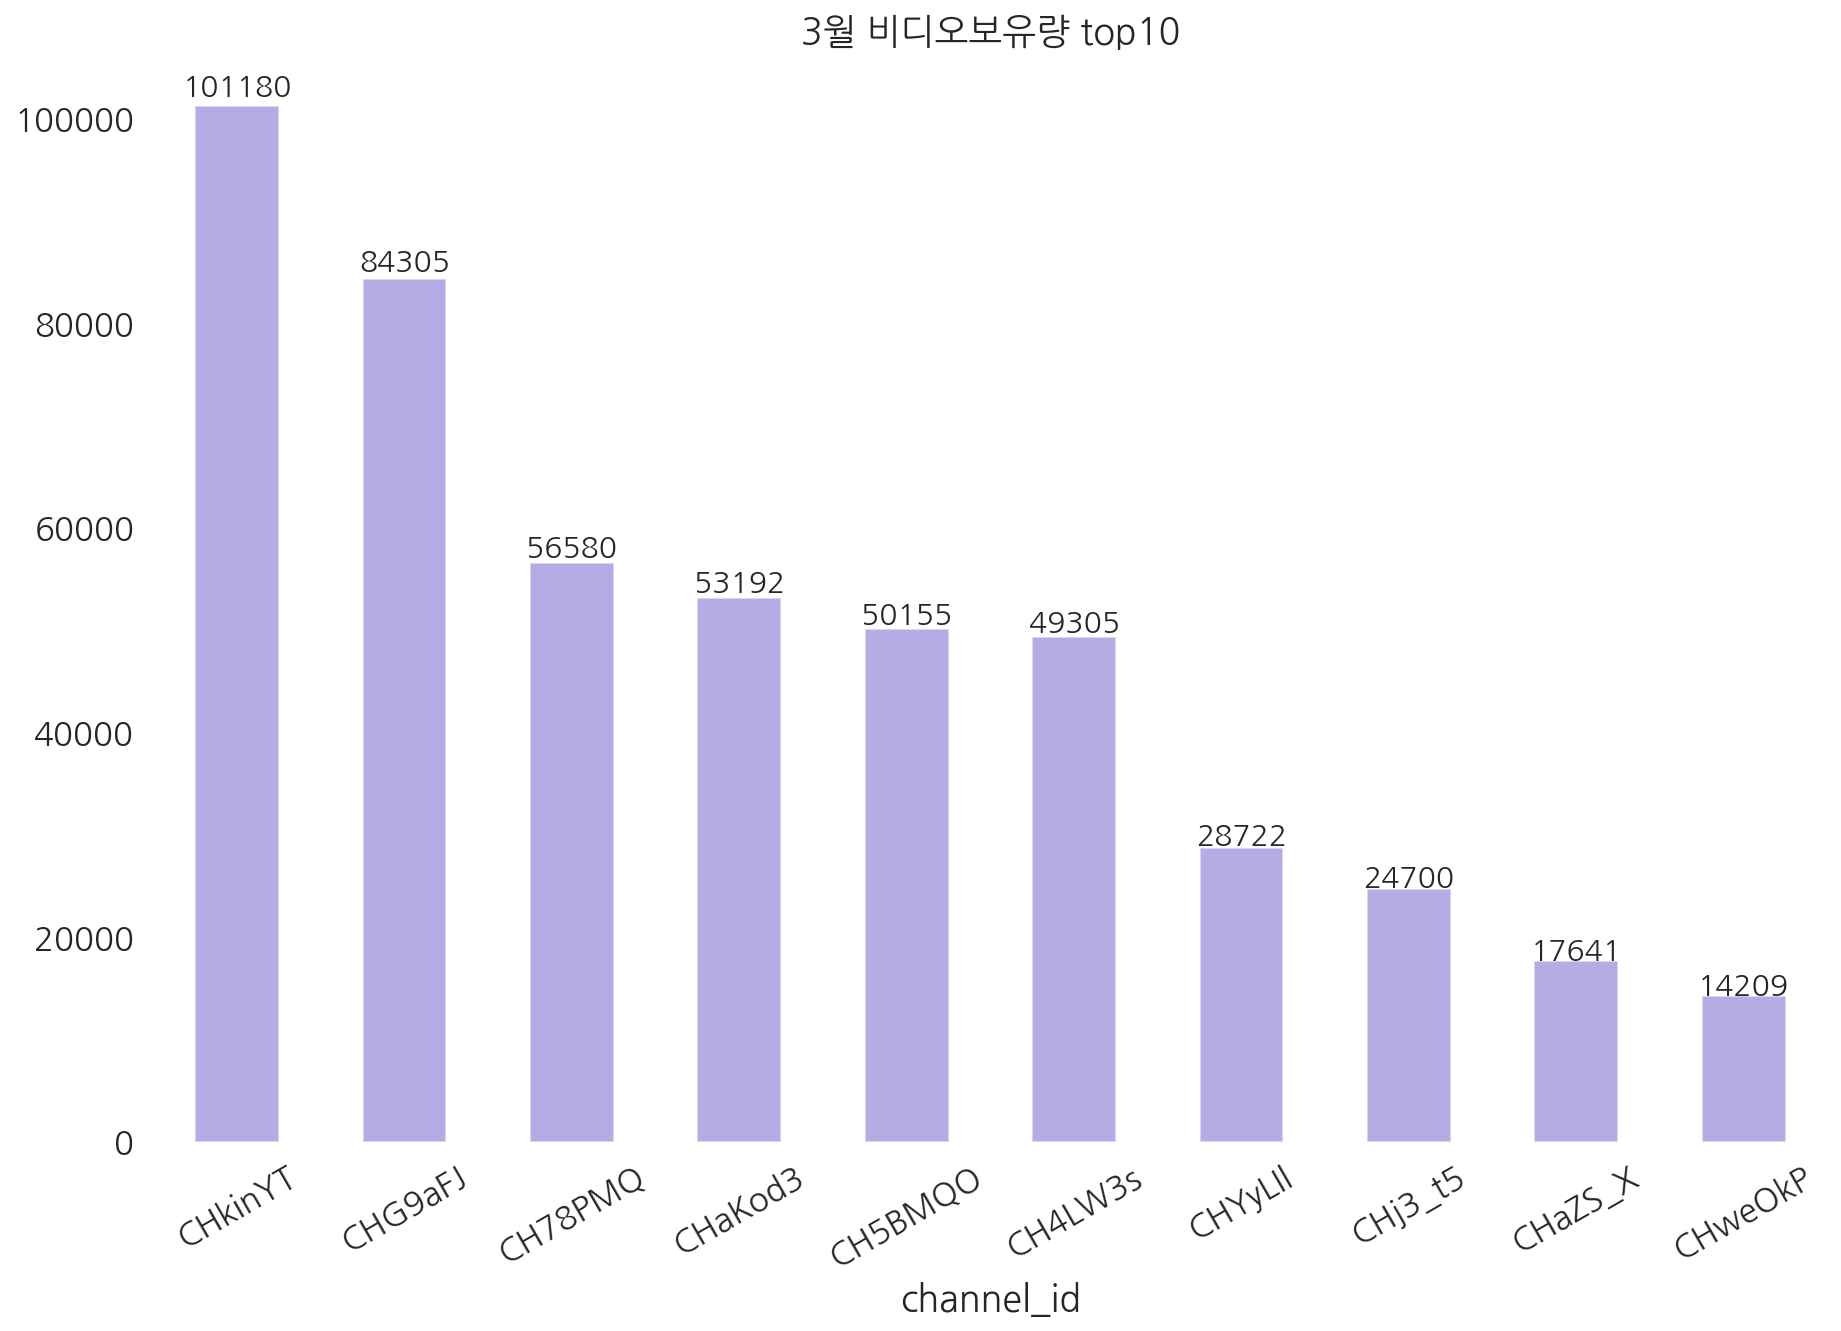

In [ ]:
ax = topten_3['on_channel_total_videos'].plot(kind='bar', title="3월 비디오보유량 top10", figsize =(15,10), color = 'slateblue', alpha=0.5)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%d"%(height), (left+width/2, height*1.01), ha='center',size = 15)
plt.xticks(rotation=30);
plt.box(False)

plt.show();

### 4월 top10

In [ ]:
month_4 = month_df[month_df['published_month']==4]
topten_4 = month_4.groupby('channel_id')[["on_channel_total_videos"]].mean().sort_values('on_channel_total_videos', ascending=False).astype(int).iloc[:10]
topten_4

,on_channel_total_videos
channel_id,
CHhlgI3,531866
CHoLrcj,280031
CHmjNKt,214734
CHcQTRi,164528
CHsU-I-,107785
CHF4Wxd,105963
CHK1sVu,97203
CHiBr0b,83101
CHYZv9v,77787


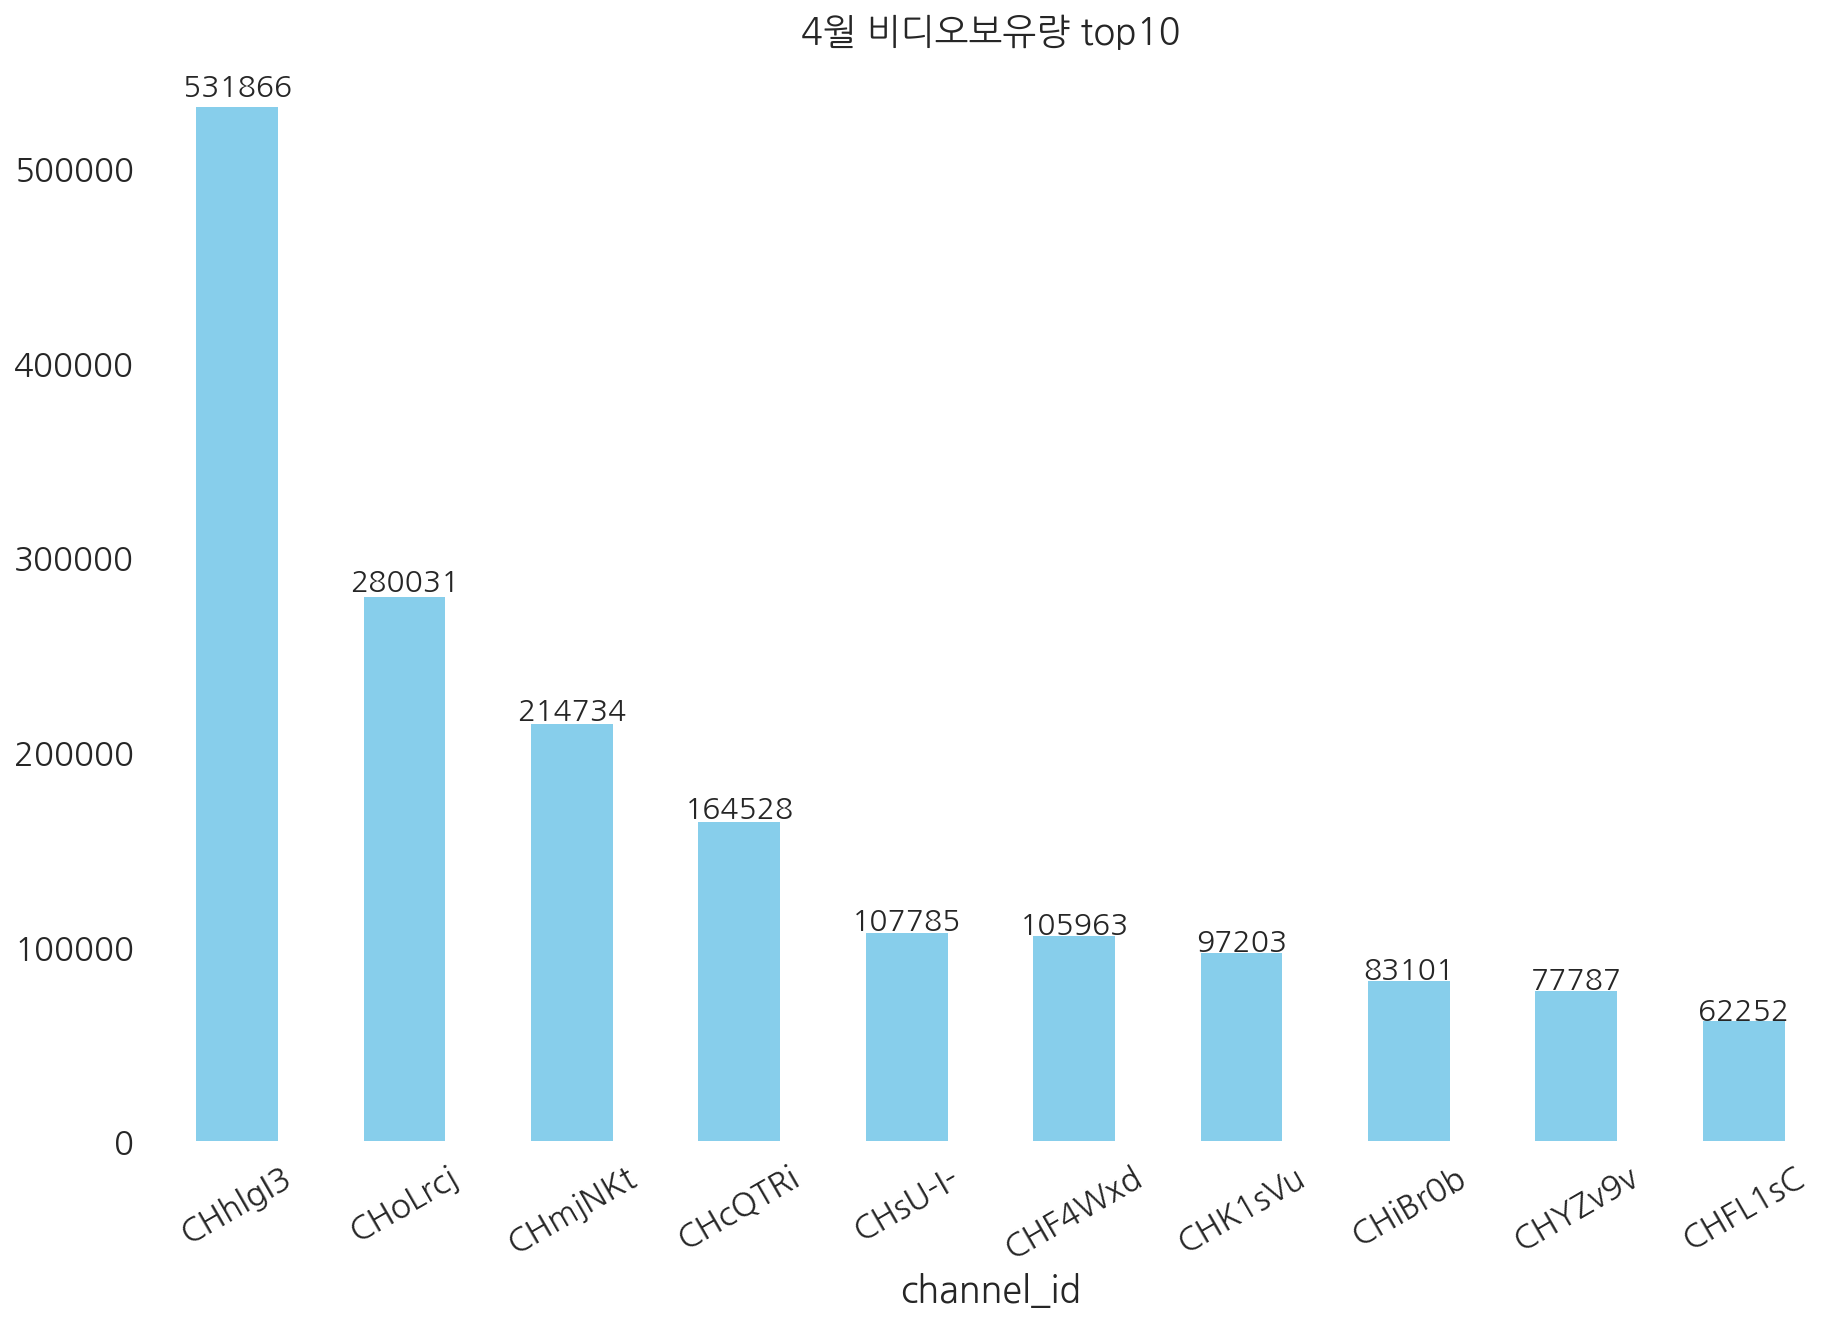

In [ ]:
ax = topten_4['on_channel_total_videos'].plot(kind='bar', title="4월 비디오보유량 top10", figsize =(15,10), color = 'skyblue')
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%d"%(height), (left+width/2, height*1.01), ha='center',size = 15)
plt.xticks(rotation=30);
plt.box(False)

plt.show();

### 5월 top10

In [ ]:
month_5 = month_df[month_df['published_month']==5]
topten_5 = month_5.groupby('channel_id')[["on_channel_total_videos"]].mean().sort_values('on_channel_total_videos', ascending=False).astype(int).iloc[:10]
topten_5

,on_channel_total_videos
channel_id,
CHhlgI3,537493
CHTHCOP,346975
CH6erID,340316
CHoLrcj,280770
CHmjNKt,215095
CHcQTRi,166889
CHsU-I-,109862
CHF4Wxd,108337
CHG9aFJ,87083


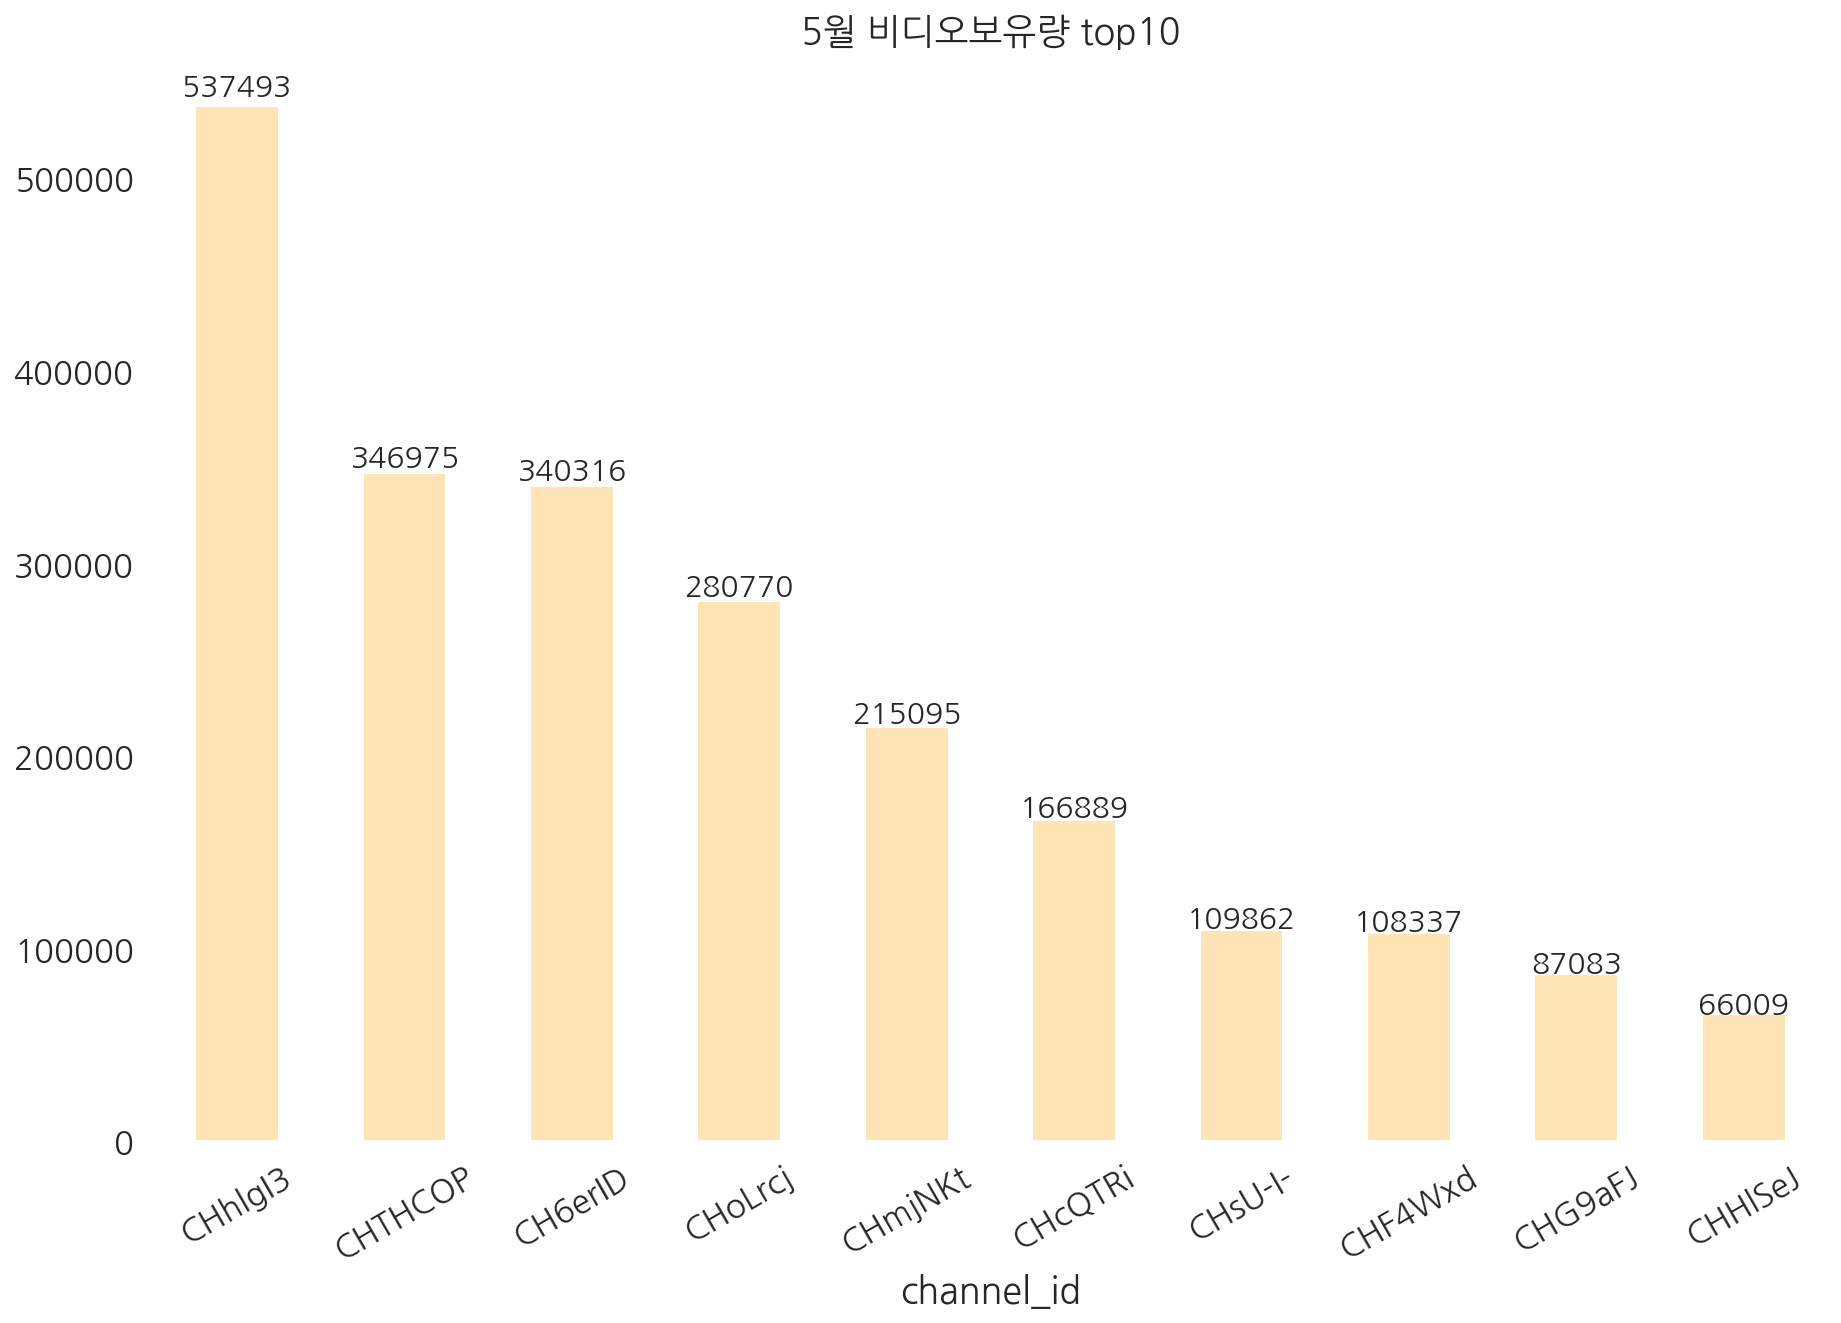

In [ ]:
ax = topten_5['on_channel_total_videos'].plot(kind='bar', title="5월 비디오보유량 top10", figsize =(15,10), color = 'moccasin')
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%d"%(height), (left+width/2, height*1.01), ha='center',size = 15)
plt.xticks(rotation=30);
plt.box(False)

plt.show();

### 6월 top10

In [ ]:
month_6 = month_df[month_df['published_month']==6]
topten_6 = month_6.groupby('channel_id')[["on_channel_total_videos"]].mean().sort_values('on_channel_total_videos', ascending=False).astype(int).iloc[:10]
topten_6

,on_channel_total_videos
channel_id,
CHhlgI3,545282
CHTHCOP,351721
CH6erID,340526
CHoLrcj,281313
CHmjNKt,215586
CHcQTRi,171310
CHaEIlQ,146459
CHmQdC1,141622
CHo-E2l,137493


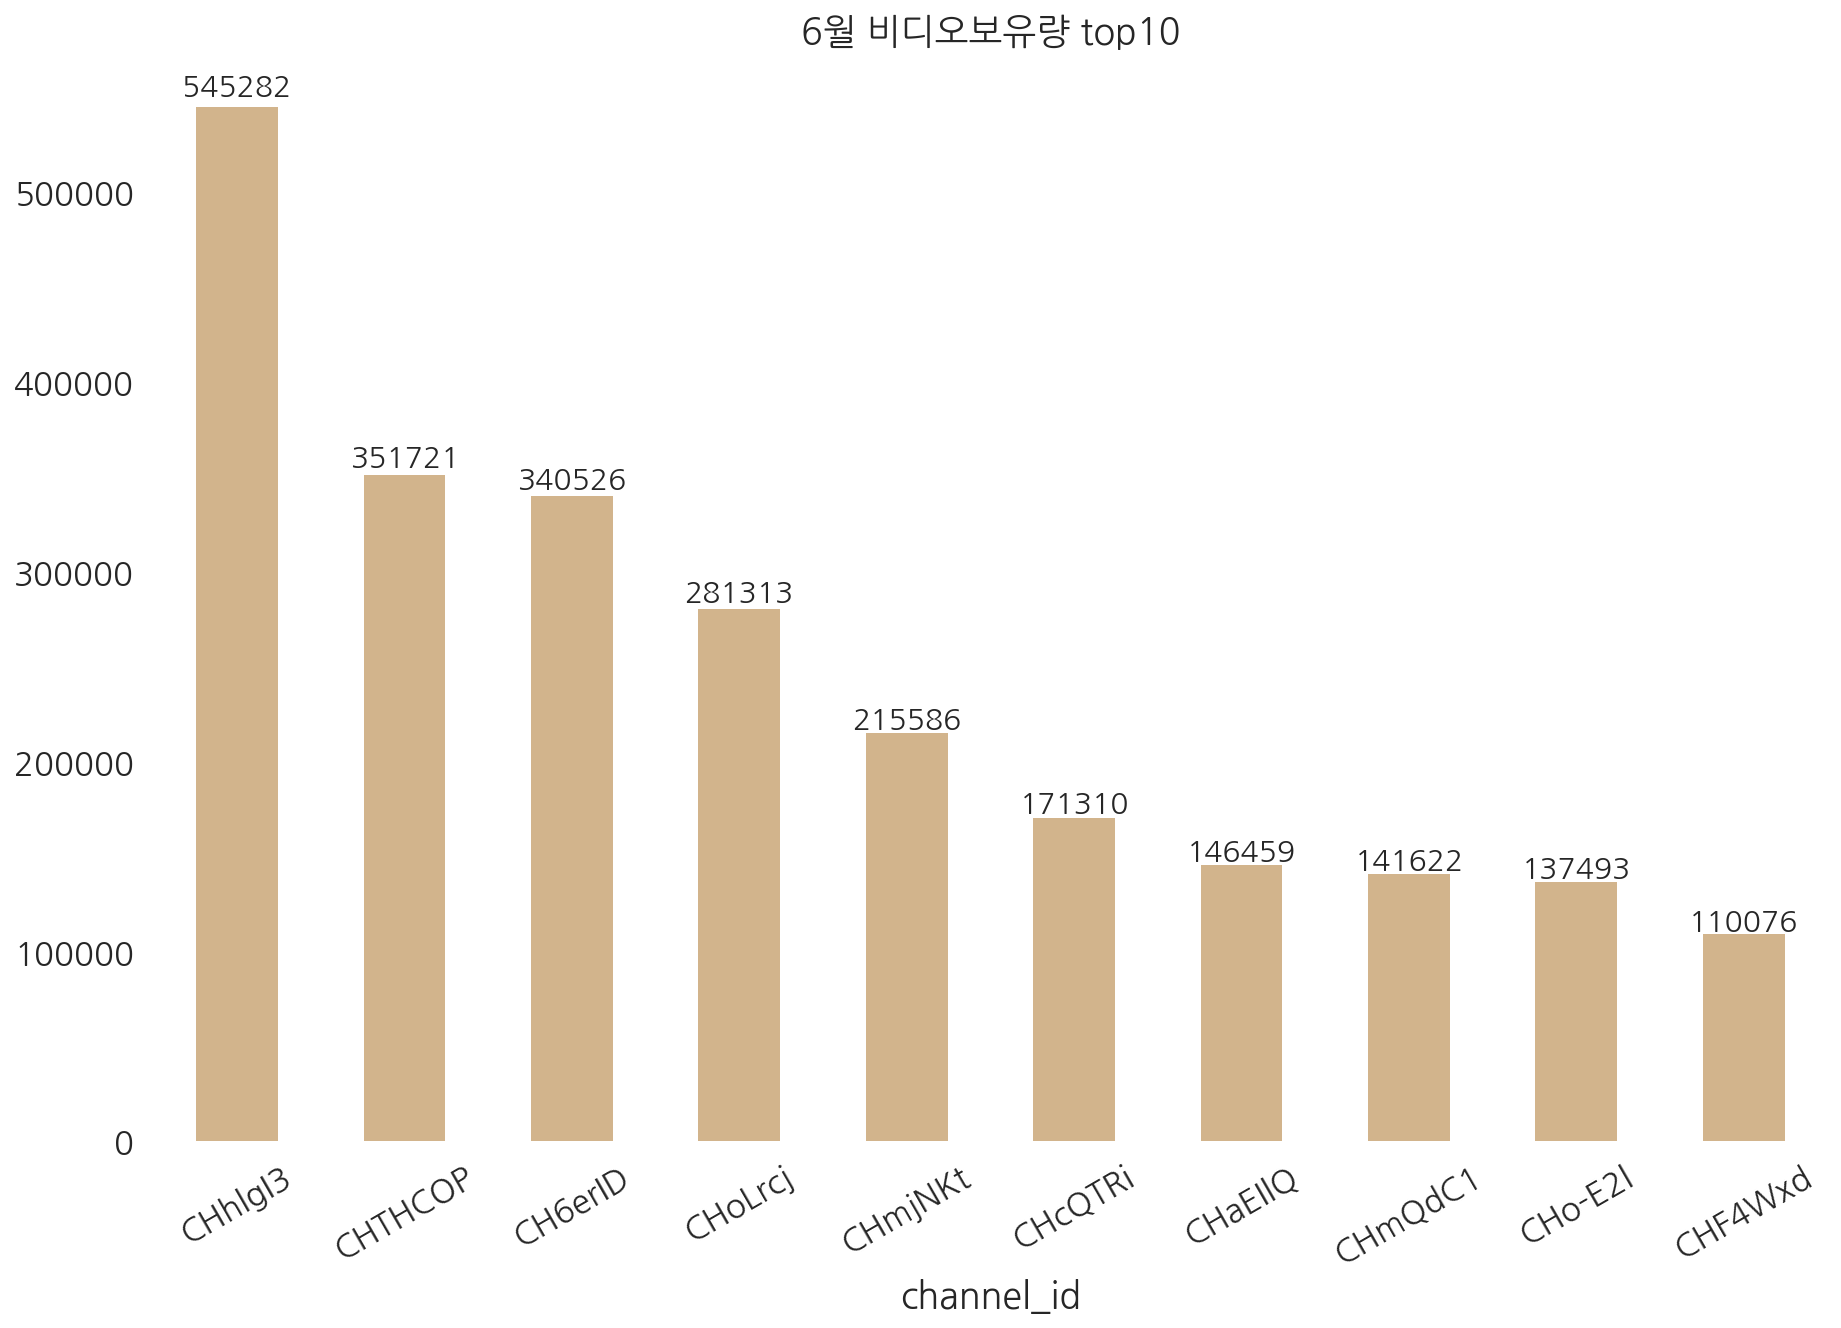

In [ ]:
ax = topten_6['on_channel_total_videos'].plot(kind='bar', title="6월 비디오보유량 top10", figsize =(15,10), color = 'tan')
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%d"%(height), (left+width/2, height*1.01), ha='center',size = 15)
plt.xticks(rotation=30);
plt.box(False)

plt.show();

### 7월 top10

In [ ]:
# 7월 row만 꺼내기.
month_7 = month_df[month_df['published_month']==7]
topten_7 = month_7.groupby('channel_id')[["on_channel_total_videos"]].mean().sort_values('on_channel_total_videos', ascending=False).astype(int).iloc[:10]
topten_7

,on_channel_total_videos
channel_id,
CHTHCOP,359002
CH6erID,340724
CHoLrcj,281748
CHmjNKt,216350
CHcQTRi,174048
CHsU-I-,114305
CHF4Wxd,113053
CHkinYT,109813
CHK1sVu,98988


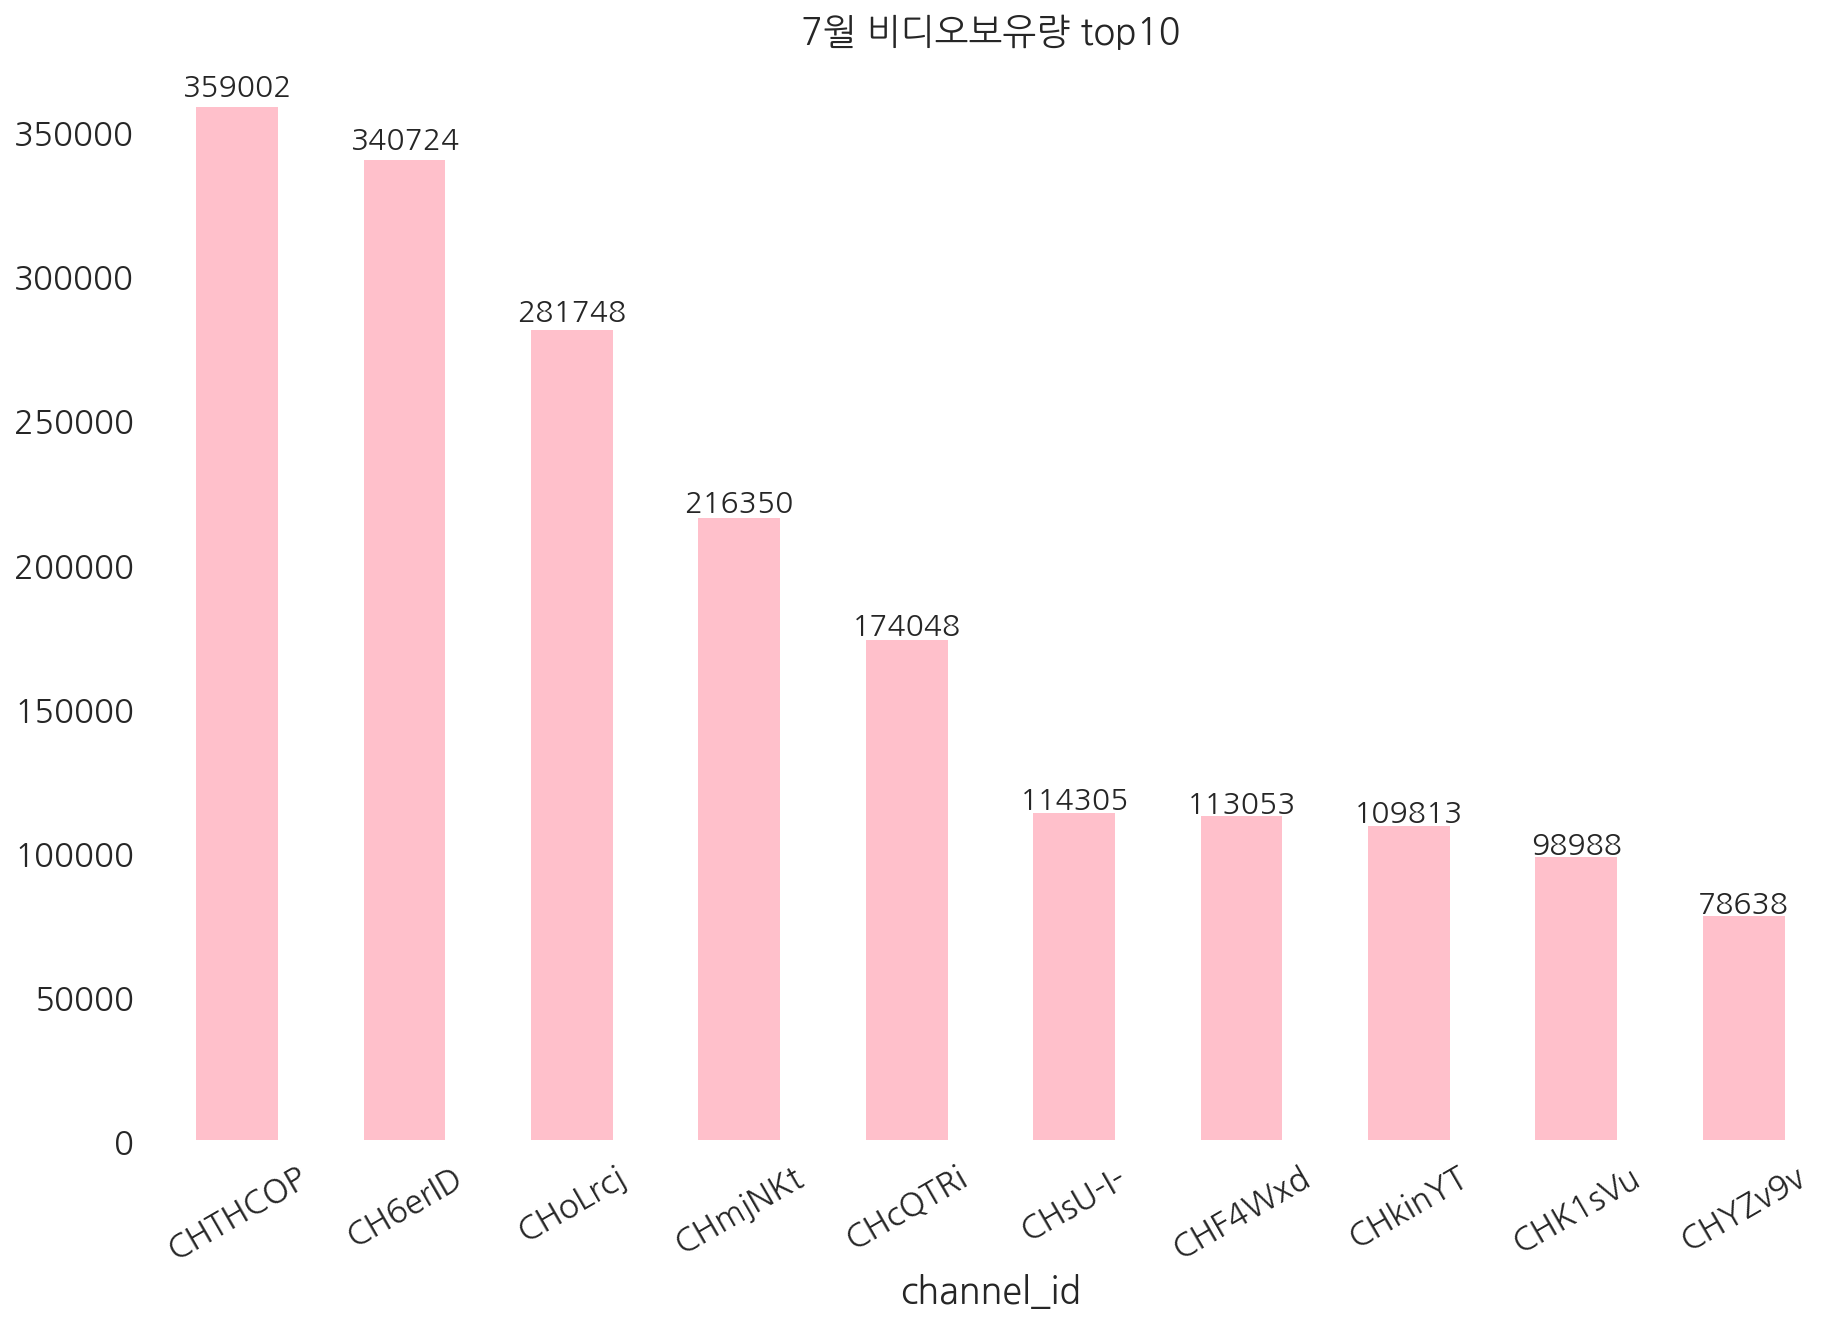

In [ ]:
ax = topten_7['on_channel_total_videos'].plot(kind='bar', title="7월 비디오보유량 top10", figsize =(15,10), color = 'pink')
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%d"%(height), (left+width/2, height*1.01), ha='center',size = 15)
plt.xticks(rotation=30);
plt.box(False)

plt.show();

## 4) 주별 TOP5 채널 (분류 기준은 비디오 개수)

### 3월 주별 top5

3월의 데이터프레임을 가져옵니다.

In [ ]:
month_3

,channel_id,category_name,published_date,on_channel_total_videos,published_month
134,CHicKQU,Education,2021-03-30,574,3
138,CHPZ4e8,People & Blogs,2021-03-31,283,3
173,CHqq-ov,Entertainment,2021-03-29,930,3
174,CHaZS_X,People & Blogs,2021-03-30,17641,3
210,CHG9aFJ,News & Politics,2021-03-29,84305,3
...,...,...,...,...,...
2474,CHnet0I,People & Blogs,2021-03-28,153,3
2487,CHtCiO5,Music,2021-03-31,1490,3
2509,CHYDmx2,Music,2021-03-31,1846,3
2549,CHyuL_X,People & Blogs,2021-03-31,90,3


In [ ]:
# 주단위로 구분
month_3['week'] = month_3['published_date'].dt.to_period(freq = 'W')

In [ ]:
month_3['week'].unique()

<PeriodArray>
['2021-03-29/2021-04-04', '2021-03-22/2021-03-28']
Length: 2, dtype: period[W-SUN]

In [ ]:
# 주별로, 채널별 video 평균개수
month_3_week = month_3.pivot_table('on_channel_total_videos',['week','channel_id'])
month_3_week

on_channel_total_videos
week                  channel_id                         
2021-03-22/2021-03-28 CH2qVOO                         337
                      CH7Krez                          86
                      CHCA4-e                         155
                      CHGiqkg                          99
                      CHIY5oU                           4
...                                                   ...
2021-03-29/2021-04-04 CHtfriF                         222
                      CHvW8no                         155
                      CHyCL5k                         436
                      CHyn-K7                         292
                      CHyuL_X                          90

[67 rows x 1 columns]

In [ ]:
week = [0,1,2,3,4,5]
week[4] = month_3_week.loc['2021-03-22/2021-03-28']
week[4] = week[4].reset_index().sort_values('on_channel_total_videos', ascending=False).set_index('channel_id')[:5]
week[4]

,week,on_channel_total_videos
channel_id,,
CHweOkP,2021-03-22/2021-03-28,14209
CHlzB2i,2021-03-22/2021-03-28,1239
CHkh6Tl,2021-03-22/2021-03-28,895
CHicKQU,2021-03-22/2021-03-28,573
CHWrh9h,2021-03-22/2021-03-28,375


In [ ]:
week[5] = month_3_week.loc['2021-03-29/2021-04-04']
week[5]= week[5].reset_index().sort_values('on_channel_total_videos', ascending=False).set_index('channel_id')[:5]
week[5]

,week,on_channel_total_videos
channel_id,,
CHkinYT,2021-03-29/2021-04-04,101180
CHG9aFJ,2021-03-29/2021-04-04,84305
CH78PMQ,2021-03-29/2021-04-04,56580
CHaKod3,2021-03-29/2021-04-04,53192
CH5BMQO,2021-03-29/2021-04-04,50155


In [ ]:
li = [0, 1,2,3,'2021-03-22/2021-03-28', '2021-03-29/2021-04-04']

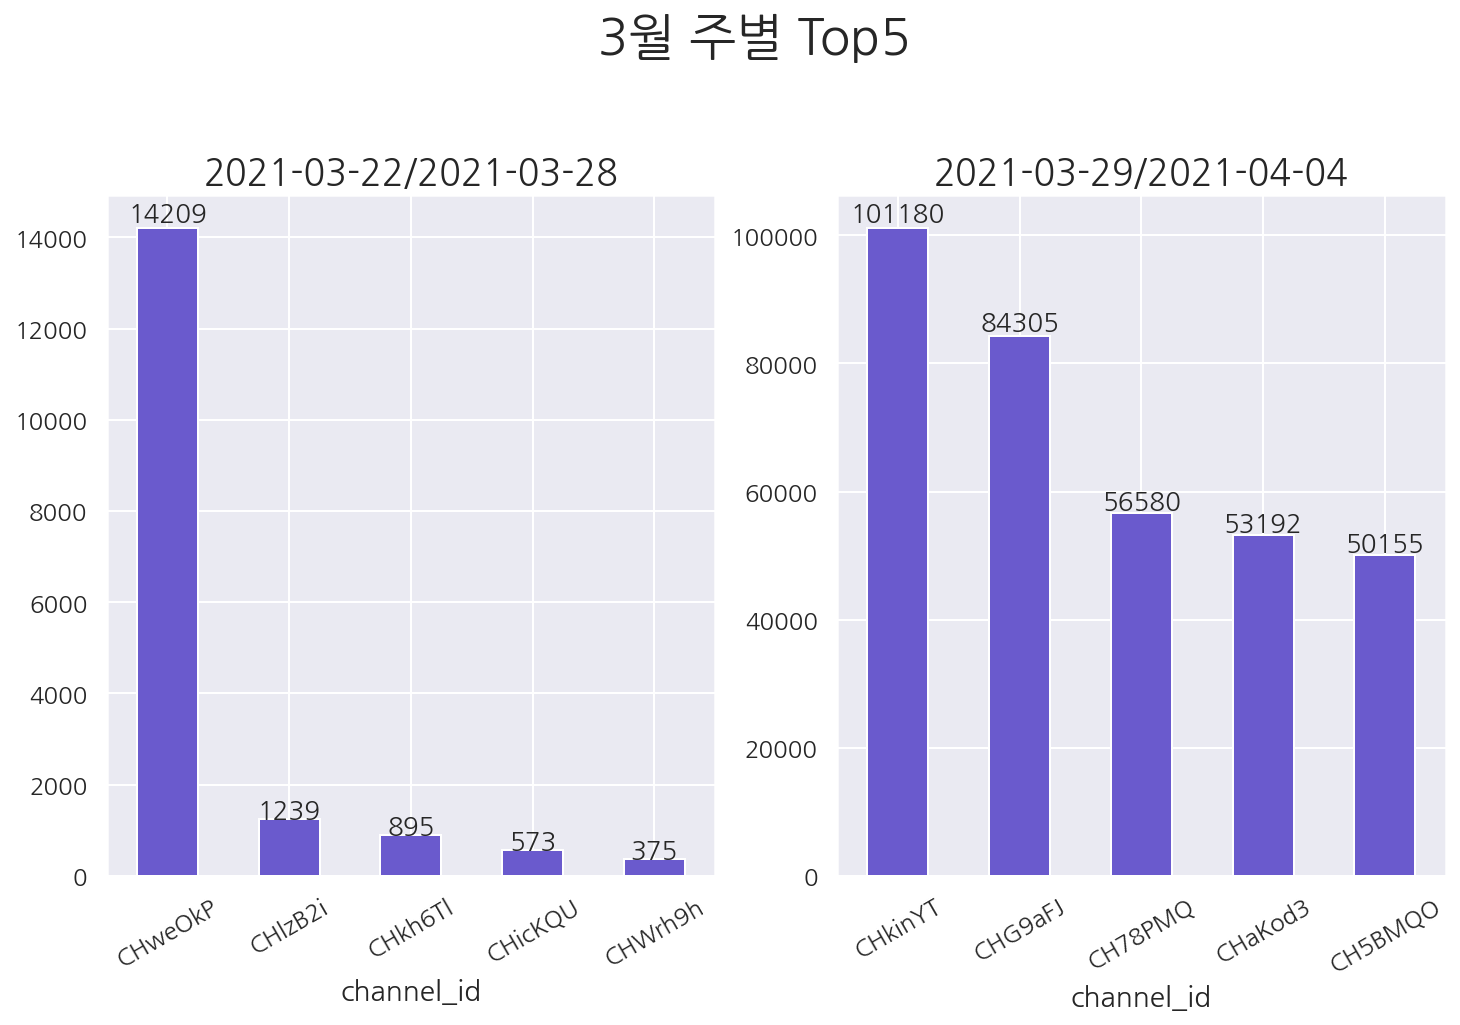

In [ ]:
# plt.rcParams['figure.figsize'] = [12, 6]

# 전체 subplot 그리기
fig, axis = plt.subplots(1, 2)

# 대표제목과의 간격설정
fig.subplots_adjust(top=0.8)

# 전체 제목
fig.suptitle('3월 주별 Top5', fontsize = 25);

for i, grp in enumerate([4,5]):
    plt.subplot(1, 2, i+1)

    ax = week[grp]['on_channel_total_videos'].plot(kind='bar', title=f"{li[grp]}", figsize =(12,7), color = 'slateblue')

          # 숫자 기입
    for p in ax.patches:
        left, bottom, width, height = p.get_bbox().bounds
        ax.annotate("%d"%(height), (left+width/2, height*1.01), ha='center',size = 13)

    plt.title(f"{li[grp]}", fontsize=18)
    plt.xlabel('channel_id', fontsize=14)
    plt.xticks(fontsize=12, rotation=30)
    plt.yticks(fontsize=12)

### 4월 주별 top5

4월의 데이터프레임을 가져옵니다.

In [ ]:
month_4

,channel_id,category_name,published_date,on_channel_total_videos,published_month
7,CHYgUhR,Entertainment,2021-04-30,167,4
12,CHEf_Bc,Music,2021-04-05,3676,4
13,CHkh6Tl,People & Blogs,2021-04-11,896,4
18,CH9HNi_,Entertainment,2021-04-23,616,4
19,CHicKQU,Education,2021-04-02,575,4
...,...,...,...,...,...
2629,CHuhAUM,Music,2021-04-11,552,4
2630,CHYRrUD,News & Politics,2021-04-28,3417,4
2635,CHgeeQu,Entertainment,2021-04-06,174,4
2641,CHO4RG1,Science & Technology,2021-04-20,1139,4


In [ ]:
# 주단위로 구분
month_4['week'] = month_4['published_date'].dt.to_period(freq = 'W')

In [ ]:
month_4['week'].unique()

<PeriodArray>
['2021-04-26/2021-05-02', '2021-04-05/2021-04-11', '2021-04-19/2021-04-25',
 '2021-03-29/2021-04-04', '2021-04-12/2021-04-18']
Length: 5, dtype: period[W-SUN]

In [ ]:
# 주별로, 채널별 video 평균개수
month_4_week = month_4.pivot_table('on_channel_total_videos',['week','channel_id'])
month_4_week

on_channel_total_videos
week                  channel_id                         
2021-03-29/2021-04-04 CH0PsUG                       995.5
                      CH2gasv                       792.0
                      CH2o_y8                       248.0
                      CH2qVOO                       344.0
                      CH3IZKs                       546.0
...                                                   ...
2021-04-26/2021-05-02 CHvG7co                      1937.0
                      CHwNVDl                      2885.0
                      CHwx6n_                       124.0
                      CHxM_h0                       323.0
                      CHyTB7U                       411.0

[594 rows x 1 columns]

In [ ]:
week = [0,1,2,3,4,5]
li = [0, '2021-03-29/2021-04-04', '2021-04-05/2021-04-11', '2021-04-12/2021-04-18', '2021-04-19/2021-04-25','2021-04-26/2021-05-02']
for i in range(1,6):
  week[i] = month_4_week.loc[li[i]]
  week[i] = week[i].reset_index().sort_values('on_channel_total_videos', ascending=False).set_index('channel_id')[:5]

In [ ]:
week[1]

,week,on_channel_total_videos
channel_id,,
CHoLrcj,2021-03-29/2021-04-04,279926.0
CHK1sVu,2021-03-29/2021-04-04,96751.0
CHFL1sC,2021-03-29/2021-04-04,62097.0
CHaKod3,2021-03-29/2021-04-04,53194.0
CH_6zPf,2021-03-29/2021-04-04,26910.0


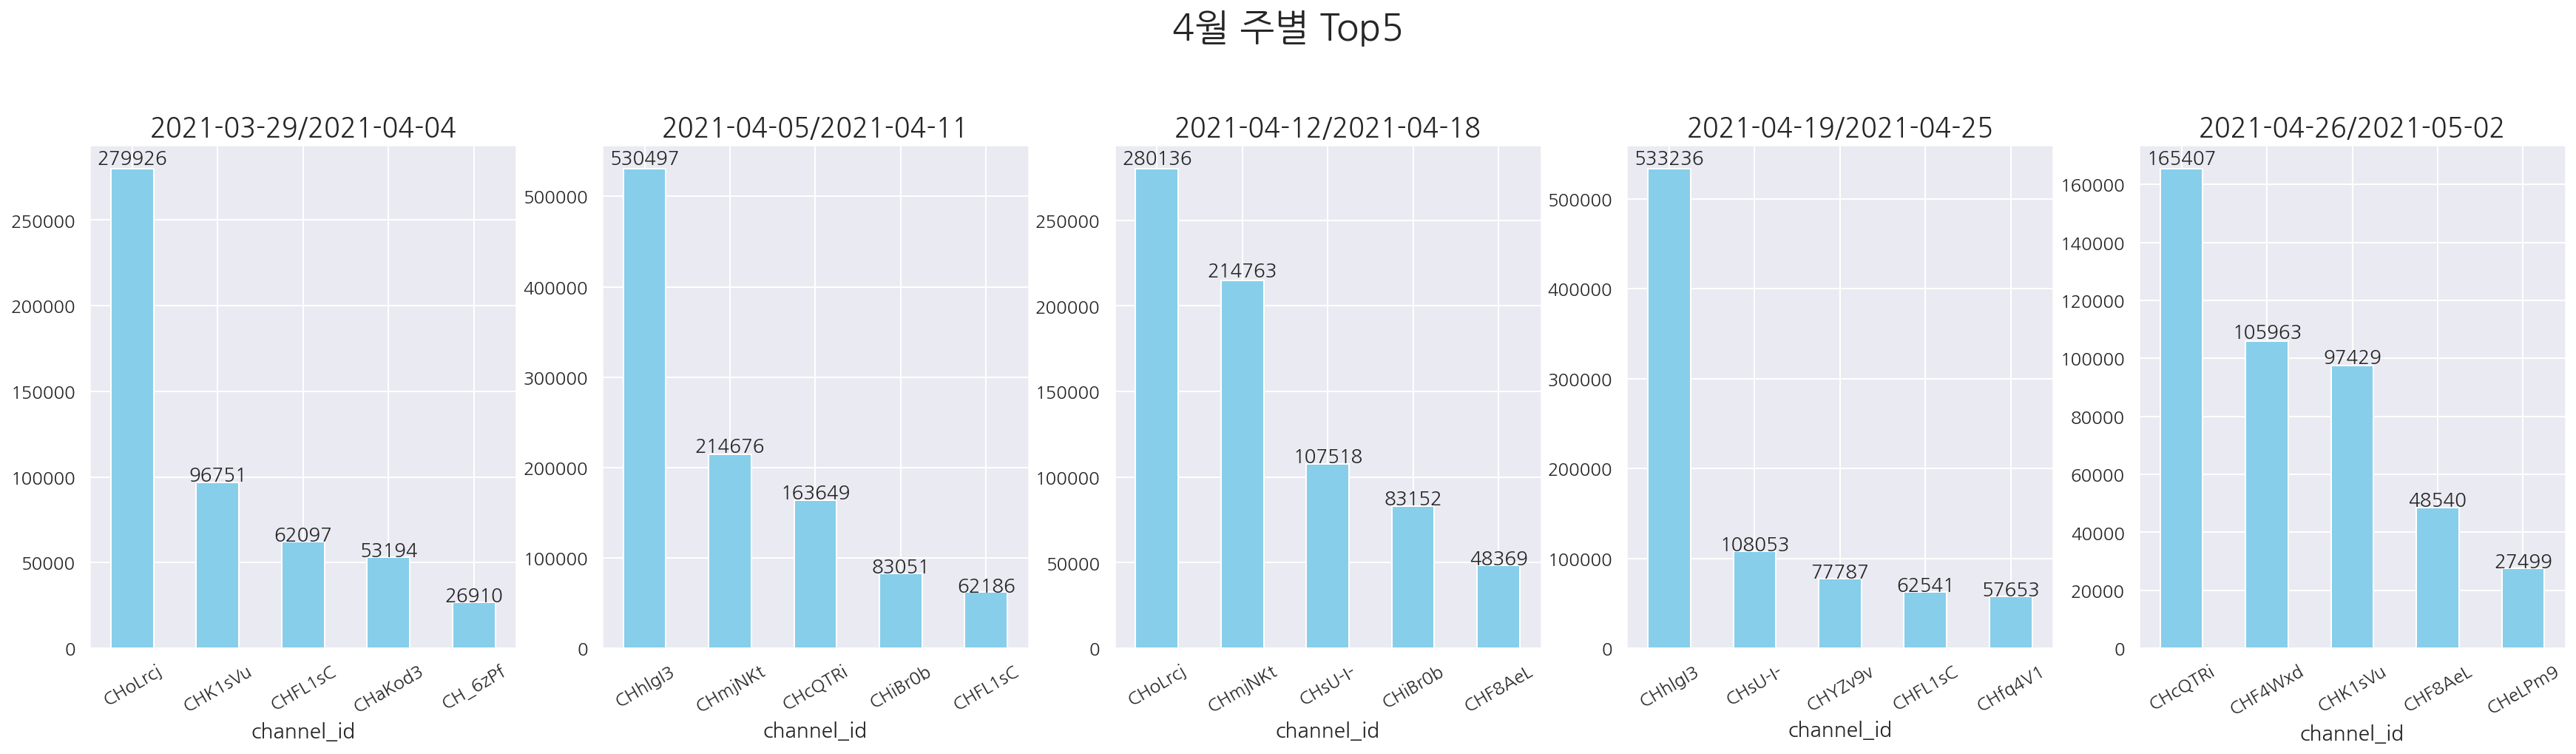

In [ ]:
# plt.rcParams['figure.figsize'] = [12, 6]

# 전체 subplot 그리기
fig, axis = plt.subplots(1, 5)

# 대표제목과의 간격설정
fig.subplots_adjust(top=0.8)

# 전체 제목
fig.suptitle('4월 주별 Top5', fontsize = 25);

for i, grp in enumerate([1,2,3,4,5]):
    plt.subplot(1, 5, i+1)

    ax = week[grp]['on_channel_total_videos'].plot(kind='bar', title=f"{li[grp]}", figsize =(30,7), color = 'skyblue')

          # 숫자 기입
    for p in ax.patches:
        left, bottom, width, height = p.get_bbox().bounds
        ax.annotate("%d"%(height), (left+width/2, height*1.01), ha='center',size = 13)

    plt.title(f"{li[grp]}", fontsize=18)
    plt.xlabel('channel_id', fontsize=14)
    plt.xticks(fontsize=12, rotation=30)
    plt.yticks(fontsize=12)

### 5월 주별 top5

5월의 데이터프레임을 가져옵니다.

In [ ]:
month_5

,channel_id,category_name,published_date,on_channel_total_videos,published_month
9,CHUXYT0,Entertainment,2021-05-15,1193,5
15,CHIk1-y,Science & Technology,2021-05-28,94,5
16,CHOOKj-,People & Blogs,2021-05-26,19,5
22,CHExw7_,Entertainment,2021-05-20,20,5
25,CHWrh9h,Howto & Style,2021-05-16,399,5
...,...,...,...,...,...
2616,CHheR9R,People & Blogs,2021-05-12,44,5
2618,CHdhukF,Sports,2021-05-16,282,5
2627,CHoW9qW,Entertainment,2021-05-28,156,5
2638,CHunsfa,Sports,2021-05-18,28,5


In [ ]:
# 주단위로 구분
month_5['week'] = month_5['published_date'].dt.to_period(freq = 'W')

In [ ]:
month_5['week'].unique()

<PeriodArray>
['2021-05-10/2021-05-16', '2021-05-24/2021-05-30', '2021-05-17/2021-05-23',
 '2021-05-03/2021-05-09', '2021-05-31/2021-06-06', '2021-04-26/2021-05-02']
Length: 6, dtype: period[W-SUN]

In [ ]:
# 주별로, 채널별 video 평균개수
month_5_week = month_5.pivot_table('on_channel_total_videos',['week','channel_id'])
month_5_week

on_channel_total_videos
week                  channel_id                         
2021-04-26/2021-05-02 CH-0C8y                       666.0
                      CH1L79y                      1224.0
                      CH6LBdA                        81.0
                      CH6u3fo                       135.0
                      CHAySce                       221.0
...                                                   ...
2021-05-31/2021-06-06 CHs8R3n                        18.0
                      CHsP57H                        25.0
                      CHudezj                       565.0
                      CHy1fru                       218.0
                      CHzCedB                       177.0

[563 rows x 1 columns]

In [ ]:
week = [0,1,2,3,4,5,6]
li = [0,  '2021-04-26/2021-05-02', '2021-05-03/2021-05-09', '2021-05-10/2021-05-16', '2021-05-17/2021-05-23', '2021-05-24/2021-05-30', '2021-05-31/2021-06-06']
for i in range(1,7):
  week[i] = month_5_week.loc[li[i]]
  week[i] = week[i].reset_index().sort_values('on_channel_total_videos', ascending=False).set_index('channel_id')[:5]

In [ ]:
week[1]

,week,on_channel_total_videos
channel_id,,
CHhlgI3,2021-04-26/2021-05-02,534724.0
CHfq4V1,2021-04-26/2021-05-02,57828.0
CHe52oe,2021-04-26/2021-05-02,39967.0
CHIMOyt,2021-04-26/2021-05-02,17815.0
CHTQVIX,2021-04-26/2021-05-02,13339.0


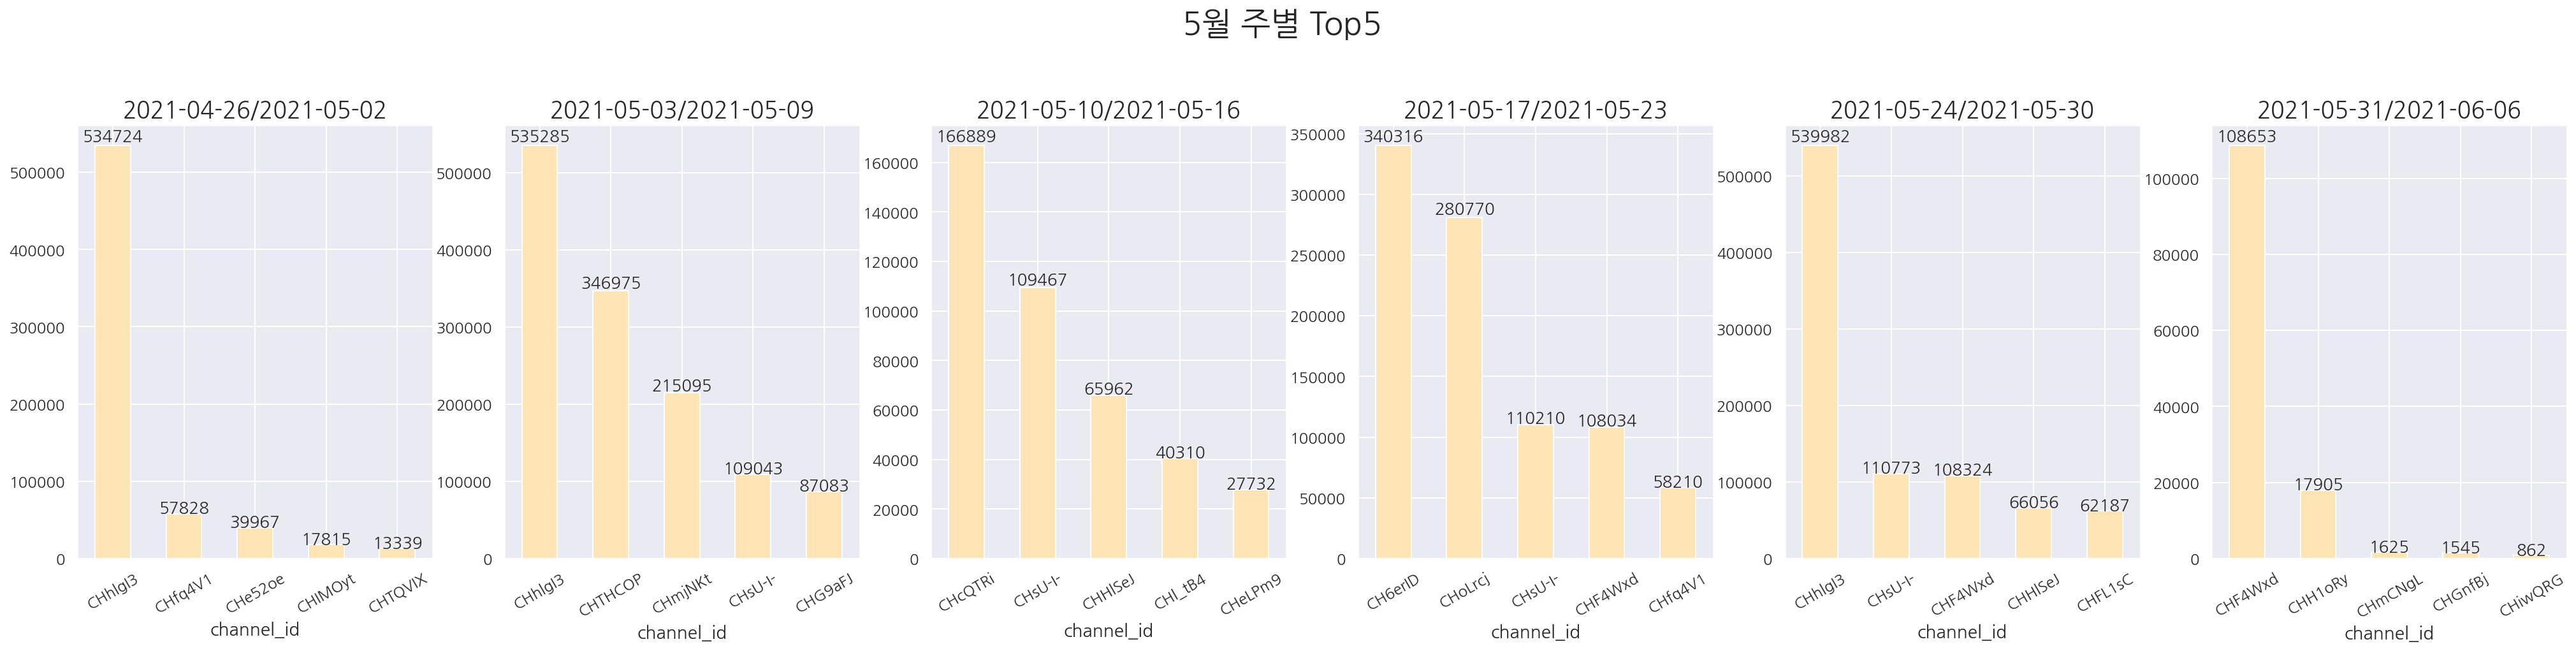

In [ ]:
# plt.rcParams['figure.figsize'] = [12, 6]

# 전체 subplot 그리기
fig, axis = plt.subplots(1, 6)

# 대표제목과의 간격설정
fig.subplots_adjust(top=0.8)

# 전체 제목
fig.suptitle('5월 주별 Top5', fontsize = 25);

for i, grp in enumerate([1,2,3,4,5,6]):
    plt.subplot(1, 6, i+1)

    ax = week[grp]['on_channel_total_videos'].plot(kind='bar', title=f"{li[grp]}", figsize =(35,7), color = 'moccasin')

          # 숫자 기입
    for p in ax.patches:
        left, bottom, width, height = p.get_bbox().bounds
        ax.annotate("%d"%(height), (left+width/2, height*1.01), ha='center',size = 13)

    plt.title(f"{li[grp]}", fontsize=18)
    plt.xlabel('channel_id', fontsize=14)
    plt.xticks(fontsize=12, rotation=30)
    plt.yticks(fontsize=12)

### 6월 주별 top5

6월의 데이터프레임을 가져옵니다.

In [ ]:
month_6

,channel_id,category_name,published_date,on_channel_total_videos,published_month
1,CHZVD--,Entertainment,2021-06-24,70,6
3,CHUQVGX,Sports,2021-06-02,224,6
5,CHaO6TY,Music,2021-06-28,1297,6
11,CHiEEF5,Entertainment,2021-06-22,1269,6
14,CHtkRVa,People & Blogs,2021-06-10,160,6
...,...,...,...,...,...
2632,CHsP57H,People & Blogs,2021-06-16,35,6
2633,CHFCtZJ,Travel & Events,2021-06-18,27780,6
2636,CH1EiHI,People & Blogs,2021-06-04,1,6
2637,CHknfGX,People & Blogs,2021-06-01,222,6


In [ ]:
# 주단위로 구분
month_6['week'] = month_6['published_date'].dt.to_period(freq = 'W')

In [ ]:
month_6['week'].unique()

<PeriodArray>
['2021-06-21/2021-06-27', '2021-05-31/2021-06-06', '2021-06-28/2021-07-04',
 '2021-06-07/2021-06-13', '2021-06-14/2021-06-20']
Length: 5, dtype: period[W-SUN]

In [ ]:
# 주별로, 채널별 video 평균개수
month_6_week = month_6.pivot_table('on_channel_total_videos',['week','channel_id'])
month_6_week

on_channel_total_videos
week                  channel_id                         
2021-05-31/2021-06-06 CH0VR2v                        93.0
                      CH1EiHI                         1.0
                      CH1cWTE                     17433.0
                      CH26M8b                       331.0
                      CH2DHU9                       904.0
...                                                   ...
2021-06-28/2021-07-04 CHuZu8N                       318.0
                      CHwNVDl                      3716.0
                      CHy-6oZ                       361.0
                      CHybPxZ                       728.0
                      CHzRDCw                       447.0

[571 rows x 1 columns]

In [ ]:
week = [0,1,2,3,4,5,6]
li = [0,'2021-05-31/2021-06-06','2021-06-07/2021-06-13', '2021-06-14/2021-06-20', '2021-06-21/2021-06-27','2021-06-28/2021-07-04']
for i in range(1,6):
  week[i] = month_6_week.loc[li[i]]
  week[i] = week[i].reset_index().sort_values('on_channel_total_videos', ascending=False).set_index('channel_id')[:5]

In [ ]:
week[1]

,week,on_channel_total_videos
channel_id,,
CH6erID,2021-05-31/2021-06-06,340453.0
CHmjNKt,2021-05-31/2021-06-06,215586.0
CHG9aFJ,2021-05-31/2021-06-06,89426.0
CH78PMQ,2021-05-31/2021-06-06,58105.0
CHaKod3,2021-05-31/2021-06-06,53349.0


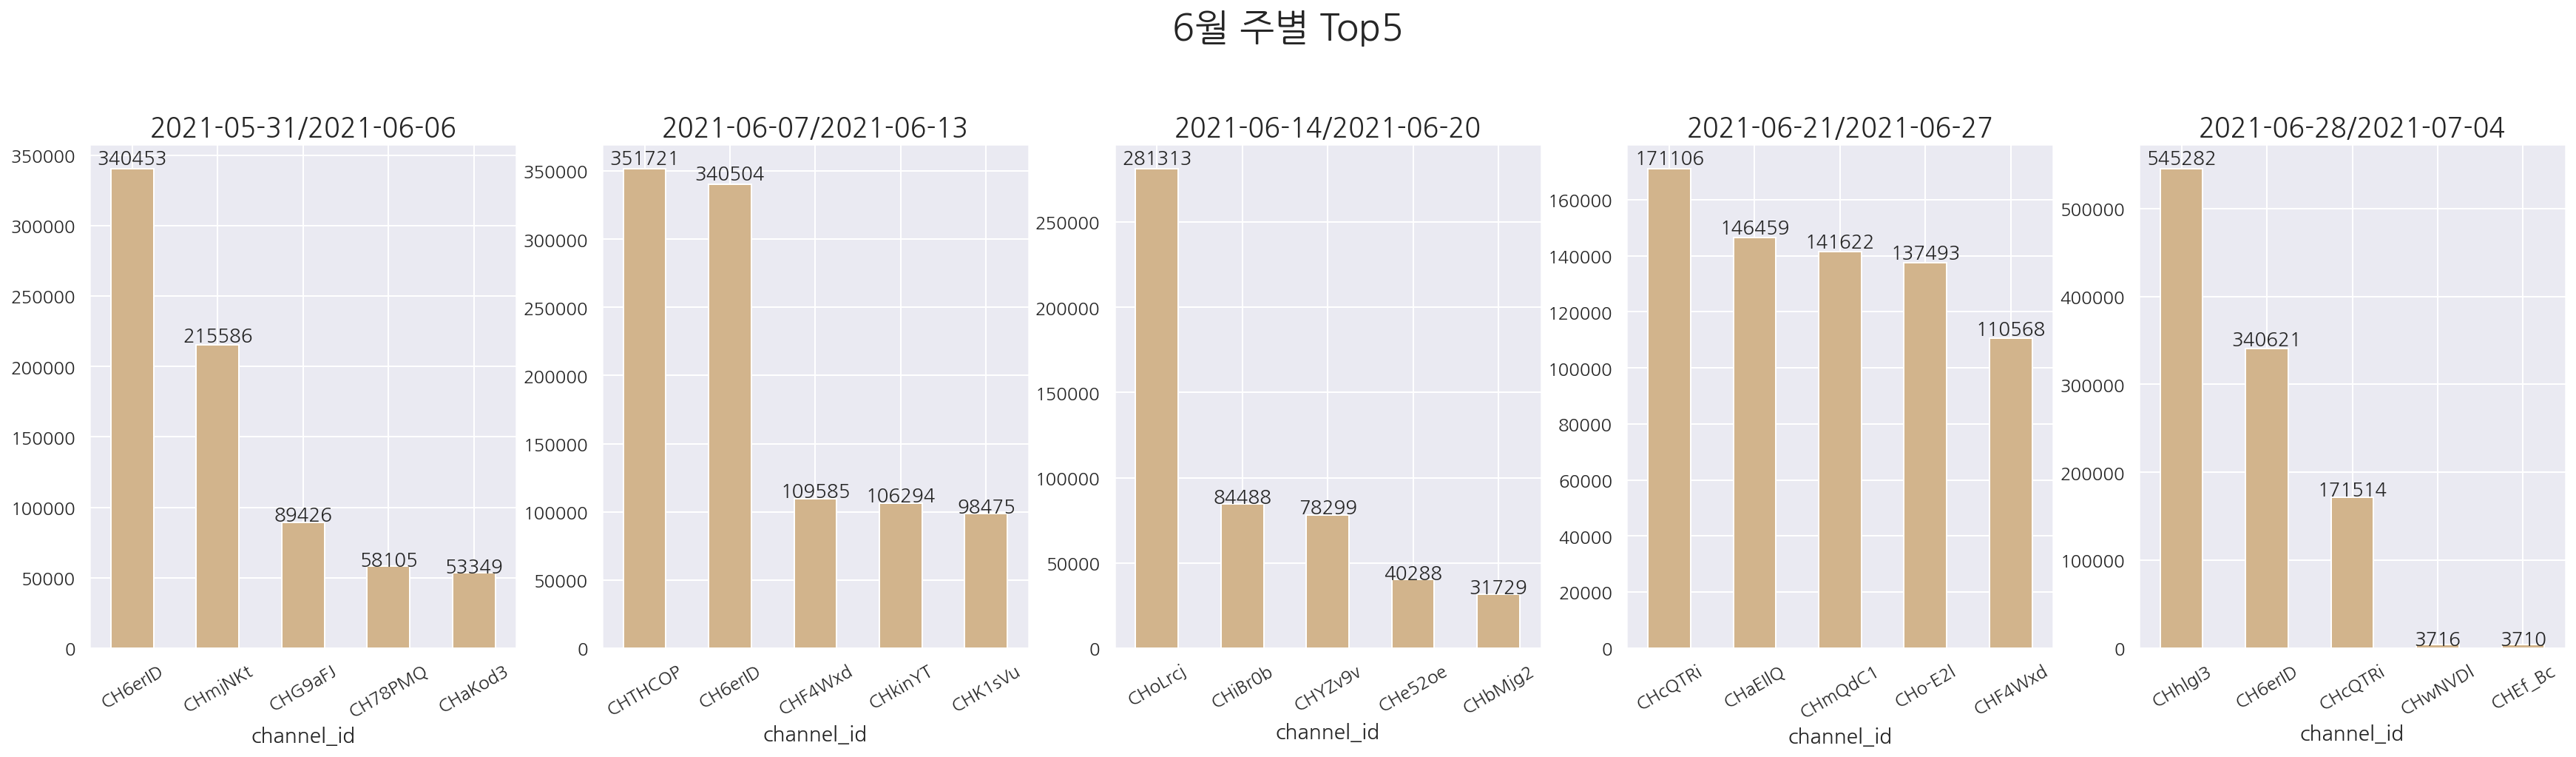

In [ ]:
# plt.rcParams['figure.figsize'] = [12, 6]

# 전체 subplot 그리기
fig, axis = plt.subplots(1, 5)

# 대표제목과의 간격설정
fig.subplots_adjust(top=0.8)

# 전체 제목
fig.suptitle('6월 주별 Top5', fontsize = 25);

for i, grp in enumerate([1,2,3,4,5]):
    plt.subplot(1, 5, i+1)

    ax = week[grp]['on_channel_total_videos'].plot(kind='bar', title=f"{li[grp]}", figsize =(30,7), color = 'tan')

          # 숫자 기입
    for p in ax.patches:
        left, bottom, width, height = p.get_bbox().bounds
        ax.annotate("%d"%(height), (left+width/2, height*1.01), ha='center',size = 13)

    plt.title(f"{li[grp]}", fontsize=18)
    plt.xlabel('channel_id', fontsize=14)
    plt.xticks(fontsize=12, rotation=30)
    plt.yticks(fontsize=12)

### 7월 주별 top5

7월의 데이터프레임을 가져옵니다.

In [ ]:
month_7

,channel_id,category_name,published_date,on_channel_total_videos,published_month
0,CH49ta0,Entertainment,2021-07-01,5947,7
2,CH9w-h_,Entertainment,2021-07-17,34270,7
4,CHhI3EX,Sports,2021-07-06,21,7
6,CHtCiO5,Music,2021-07-06,1518,7
8,CHbD8Ep,Entertainment,2021-07-29,25059,7
...,...,...,...,...,...
2625,CHoCvTl,Entertainment,2021-07-06,694,7
2626,CHArK9M,Sports,2021-07-24,2381,7
2631,CHiubh7,Autos & Vehicles,2021-07-23,217,7
2634,CHEbRSm,Music,2021-07-19,1906,7


In [ ]:
# 주단위로 구분
month_7['week'] = month_7['published_date'].dt.to_period(freq = 'W')

In [ ]:
month_7['week'].unique()

<PeriodArray>
['2021-06-28/2021-07-04', '2021-07-12/2021-07-18', '2021-07-05/2021-07-11',
 '2021-07-26/2021-08-01', '2021-07-19/2021-07-25']
Length: 5, dtype: period[W-SUN]

In [ ]:
# 주별로, 채널별 video 평균개수
month_7_week = month_7.pivot_table('on_channel_total_videos',['week','channel_id'])
month_7_week

on_channel_total_videos
week                  channel_id                         
2021-06-28/2021-07-04 CH0wNau                       299.0
                      CH1L79y                      1239.0
                      CH2DHU9                       909.0
                      CH2DoAr                        31.0
                      CH2E-9A                        87.0
...                                                   ...
2021-07-26/2021-08-01 CHrhgVH                       281.0
                      CHt_UFh                       348.0
                      CHta_NR                      1768.0
                      CHyn7ao                       133.0
                      CHzIOIS                       743.0

[516 rows x 1 columns]

In [ ]:
week = [0,1,2,3,4,5]
li = [0, '2021-06-28/2021-07-04', '2021-07-05/2021-07-11', '2021-07-12/2021-07-18', '2021-07-19/2021-07-25', '2021-07-26/2021-08-01']
for i in range(1,6):
  week[i] = month_7_week.loc[li[i]]
  week[i] = week[i].reset_index().sort_values('on_channel_total_videos', ascending=False).set_index('channel_id')[:5]

In [ ]:
week[5]

,week,on_channel_total_videos
channel_id,,
CHcQTRi,2021-07-26/2021-08-01,174106.333333
CHF4Wxd,2021-07-26/2021-08-01,113952.000000
CHkinYT,2021-07-26/2021-08-01,109950.500000
CHYZv9v,2021-07-26/2021-08-01,78641.500000
CH78PMQ,2021-07-26/2021-08-01,59068.000000


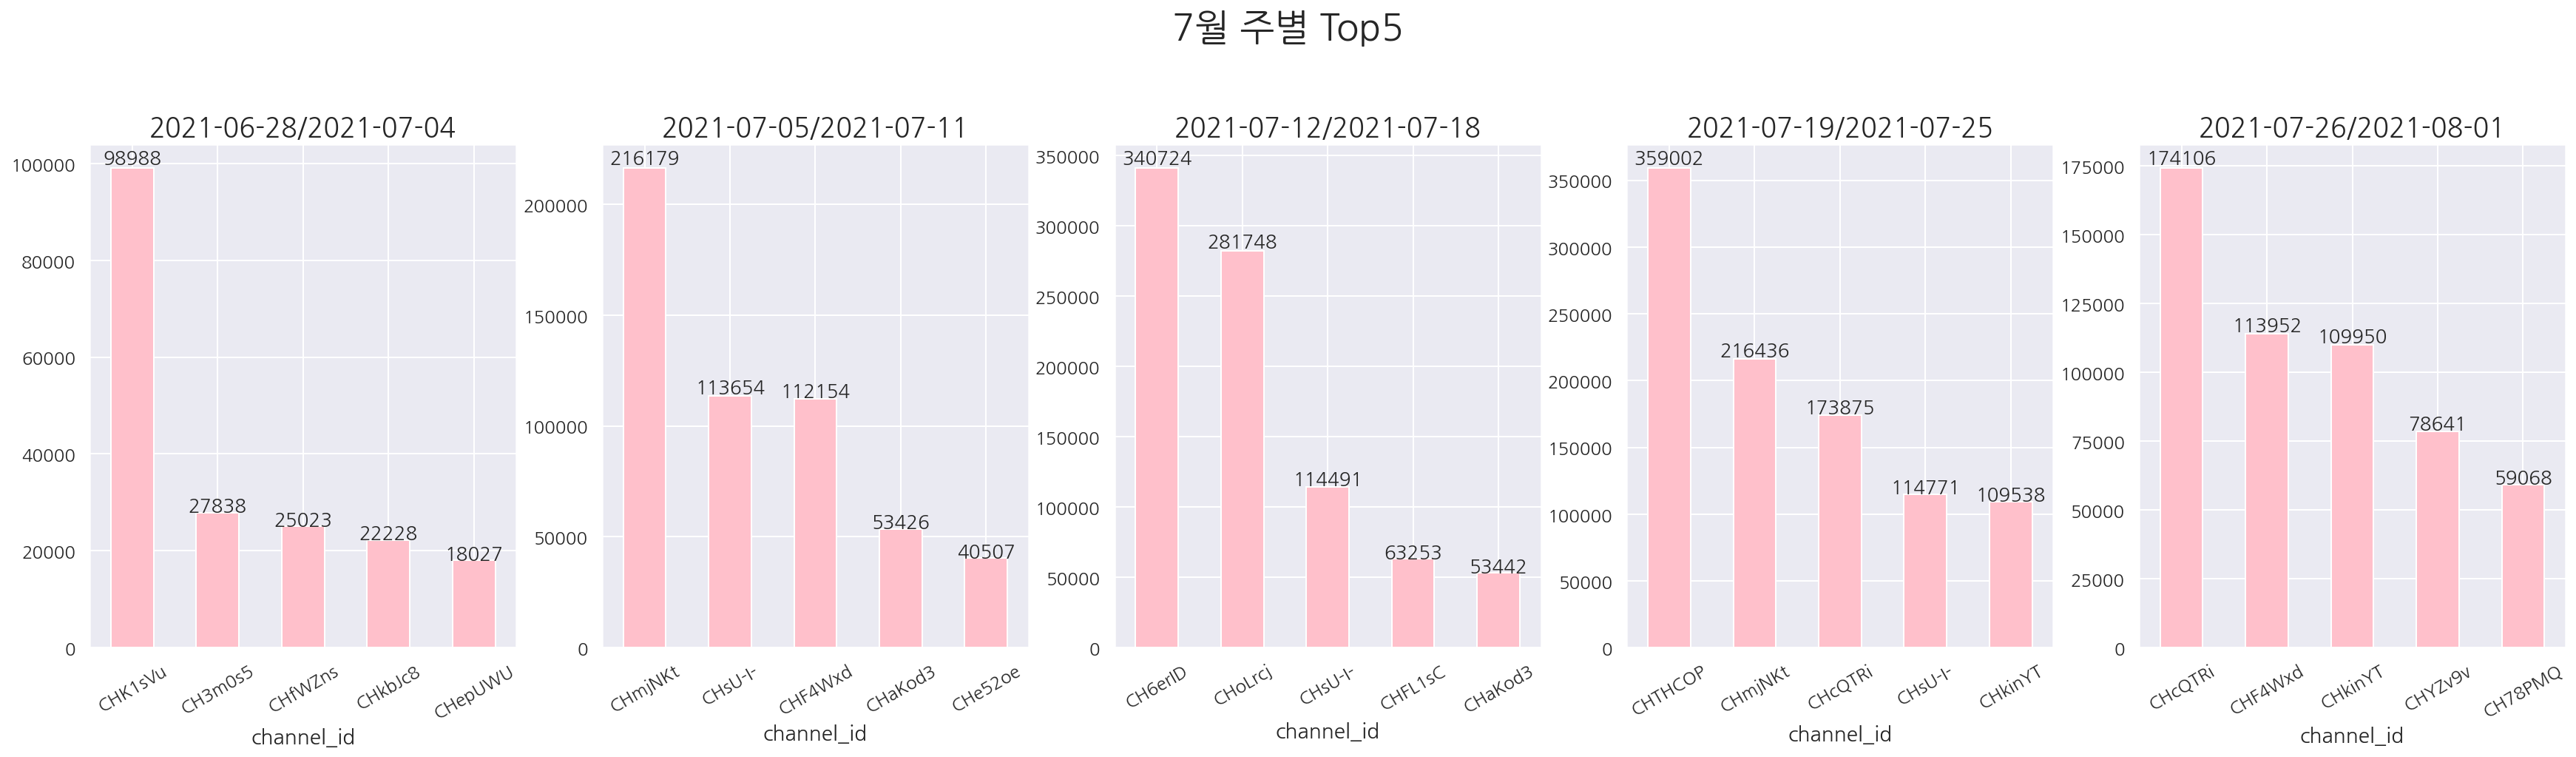

In [ ]:
# plt.rcParams['figure.figsize'] = [12, 6]

# 전체 subplot 그리기
fig, axis = plt.subplots(1, 5)

# 대표제목과의 간격설정
fig.subplots_adjust(top=0.8)

# 전체 제목
fig.suptitle('7월 주별 Top5', fontsize = 25);

for i, grp in enumerate([1,2,3,4,5]):
    plt.subplot(1, 5, i+1)

    ax = week[grp]['on_channel_total_videos'].plot(kind='bar', title=f"{li[grp]}", figsize =(30,7), color = 'pink')

          # 숫자 기입
    for p in ax.patches:
        left, bottom, width, height = p.get_bbox().bounds
        ax.annotate("%d"%(height), (left+width/2, height*1.01), ha='center',size = 13)

    plt.title(f"{li[grp]}", fontsize=18)
    plt.xlabel('channel_id', fontsize=14)
    plt.xticks(fontsize=12, rotation=30)
    plt.yticks(fontsize=12)